<a href="https://colab.research.google.com/github/cluis0/APRENDIZAJESUPERVISADO/blob/main/Solucion_Reto_SC_63_V2_CarlosPatricio_LuisCastillo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---


Archivo : **Solucion_Reto_SC_63_V2_CarlosPatricio_LuisCastillo**.
ipynb

**Versión 2**

La diferencia con la versión 1, es que se irán documentando todas las fases de código y sacando conclusiones preliminares de las salidas de las ejecuciones y análisis de lo que se quiere obtener.

En algunas secciones se incluye un segmento de instrucciones tal como viene en el archivo del reto. A continuación se desglosan los puntos iniciales del reto.

---



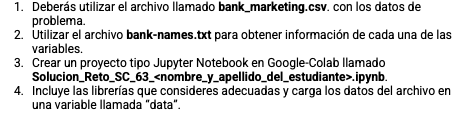



---


Se lee el archivo **bank_marketing_RETO_DS_AS.xlsx** con
información en formato Excel para iniciar con el análisis del problema de marketing del banco.

---



In [1]:
import pandas as pd

data = pd.read_excel('bank_marketing_RETO_DS_AS.xlsx')

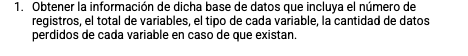



---


Las siguientes líneas de código me permiten ver la estadística de los valores de la población, el tamaño, el tipo de dato, conocer si hay valores NaN (*not a number*) y proceder a cambiar los tipos de datos objeto a tipo de datos númerico para proceder con estadísticos matemáticos.

Aquí claramente vemos que los valores de entrada X son todos los atributos diferentes de "y" la cual es la variable de salida Y. Esta variable representa la viabilidad de ser confiable de obtención de crédito o no (1/0). Claramente, es un problema de Aprendizaje Supervisado con un tipo de clasificación binario.

---



In [2]:
data.describe(include = 'all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,9000.000000,9000,9000,9000,9000,9000.000000,9000,9000,9000,9000.000000,9000,9000.000000,9000.000000,9000.000000,9000.000000,9000,9000
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,management,married,secondary,no,NaN,no,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,1999,5124,4486,8865,NaN,4564,7820,6438,NaN,2361,NaN,NaN,NaN,NaN,6783,5213
mean,41.090556,NaN,NaN,NaN,NaN,1482.262778,NaN,NaN,NaN,15.619556,NaN,353.832778,2.520111,50.511333,0.788889,NaN,NaN
std,11.664253,NaN,NaN,NaN,NaN,3031.013197,NaN,NaN,NaN,8.345305,NaN,336.945158,2.737758,107.691963,2.210273,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-3058.000000,NaN,NaN,NaN,1.000000,NaN,3.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,32.000000,NaN,NaN,NaN,NaN,109.000000,NaN,NaN,NaN,8.000000,NaN,131.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,519.000000,NaN,NaN,NaN,15.000000,NaN,240.500000,2.000000,-1.000000,0.000000,NaN,NaN
75%,49.000000,NaN,NaN,NaN,NaN,1646.500000,NaN,NaN,NaN,21.000000,NaN,462.000000,3.000000,-1.000000,0.000000,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        9000 non-null   int64 
 1   job        9000 non-null   object
 2   marital    9000 non-null   object
 3   education  9000 non-null   object
 4   default    9000 non-null   object
 5   balance    9000 non-null   int64 
 6   housing    9000 non-null   object
 7   loan       9000 non-null   object
 8   contact    9000 non-null   object
 9   day        9000 non-null   int64 
 10  month      9000 non-null   object
 11  duration   9000 non-null   int64 
 12  campaign   9000 non-null   int64 
 13  pdays      9000 non-null   int64 
 14  previous   9000 non-null   int64 
 15  poutcome   9000 non-null   object
 16  y          9000 non-null   object
dtypes: int64(7), object(10)
memory usage: 1.2+ MB


In [4]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,31,self-employed,married,tertiary,no,2666,no,no,cellular,10,nov,318,2,97,6,success,yes
1,29,unemployed,single,unknown,no,1584,no,no,cellular,6,sep,245,1,-1,0,unknown,yes
2,41,blue-collar,married,secondary,no,2152,yes,no,cellular,17,nov,369,1,-1,0,unknown,no
3,50,blue-collar,married,secondary,no,84,yes,no,cellular,17,jul,18,8,-1,0,unknown,no
4,40,admin.,married,secondary,no,0,no,no,cellular,28,jul,496,2,182,11,success,yes


In [5]:
for column in data.columns:
    unique_count = data[column].nunique()
    dtype = data[column].dtype
    print(f"{column} : {unique_count} : {dtype}")

age : 74 : int64
job : 12 : object
marital : 3 : object
education : 4 : object
default : 2 : object
balance : 3476 : int64
housing : 2 : object
loan : 2 : object
contact : 3 : object
day : 31 : int64
month : 12 : object
duration : 1327 : int64
campaign : 34 : int64
pdays : 437 : int64
previous : 31 : int64
poutcome : 4 : object
y : 2 : object




---
La conclusión preliminar es que hay variables tipo "object" con máximo 12 valores diferentes por lo que ahora la elección será elegir entre el **encoder** **LE** o **OHE**. Tampoco se ve ningún valor **NaN** por lo que el preprocesamiento inicial deberá ser convertir a números las variables categóricas.

---




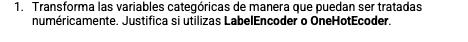



---


La justificación del uso de **LabelEnconder** (**LE**) se comprueba revisando que hay varias variables tipo "object" con una granularidad de 12 valores máximo lo cual hace que pueda crecer demasiado mi dataframe si uso **OHE**. Ademas de obsreva que las variables tipo "object" en esta particular sábana de datos son valores que no implican numerología importante en decisiones financieras, cuantificadores, etc.

El siguiente código transforma los valores categóricos a valores númericos y se vuelven a listar los estadísticos para comprobar que se llevó a cabo el cambio


---



In [6]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = encoder.fit_transform(data[column])

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        9000 non-null   int64
 1   job        9000 non-null   int64
 2   marital    9000 non-null   int64
 3   education  9000 non-null   int64
 4   default    9000 non-null   int64
 5   balance    9000 non-null   int64
 6   housing    9000 non-null   int64
 7   loan       9000 non-null   int64
 8   contact    9000 non-null   int64
 9   day        9000 non-null   int64
 10  month      9000 non-null   int64
 11  duration   9000 non-null   int64
 12  campaign   9000 non-null   int64
 13  pdays      9000 non-null   int64
 14  previous   9000 non-null   int64
 15  poutcome   9000 non-null   int64
 16  y          9000 non-null   int64
dtypes: int64(17)
memory usage: 1.2 MB


In [8]:
data.describe(include = 'all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000
mean,41.090556,4.500778,1.199778,1.267000,0.015000,1482.262778,0.492889,0.131111,0.504889,15.619556,5.462667,353.832778,2.520111,50.511333,0.788889,2.481111,0.420778
std,11.664253,3.233238,0.625139,0.745651,0.121559,3031.013197,0.499977,0.337541,0.830962,8.345305,3.147263,336.945158,2.737758,107.691963,2.210273,1.009169,0.493711
min,18.000000,0.000000,0.000000,0.000000,0.000000,-3058.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
25%,32.000000,1.000000,1.000000,1.000000,0.000000,109.000000,0.000000,0.000000,0.000000,8.000000,3.000000,131.000000,1.000000,-1.000000,0.000000,3.000000,0.000000
50%,39.000000,4.000000,1.000000,1.000000,0.000000,519.000000,0.000000,0.000000,0.000000,15.000000,6.000000,240.500000,2.000000,-1.000000,0.000000,3.000000,0.000000
75%,49.000000,7.000000,2.000000,2.000000,0.000000,1646.500000,1.000000,0.000000,1.000000,21.000000,8.000000,462.000000,3.000000,-1.000000,0.000000,3.000000,1.000000
max,95.000000,11.000000,2.000000,3.000000,1.000000,81204.000000,1.000000,1.000000,2.000000,31.000000,11.000000,3253.000000,58.000000,850.000000,58.000000,3.000000,1.000000


In [9]:
for column in data.columns:
    unique_count = data[column].nunique()
    dtype = data[column].dtype
    print(f"{column} : {unique_count} : {dtype}")

age : 74 : int64
job : 12 : int64
marital : 3 : int64
education : 4 : int64
default : 2 : int64
balance : 3476 : int64
housing : 2 : int64
loan : 2 : int64
contact : 3 : int64
day : 31 : int64
month : 12 : int64
duration : 1327 : int64
campaign : 34 : int64
pdays : 437 : int64
previous : 31 : int64
poutcome : 4 : int64
y : 2 : int64




---
El siguiente código muestra un histograma para comprobar la distribución de "y".

---




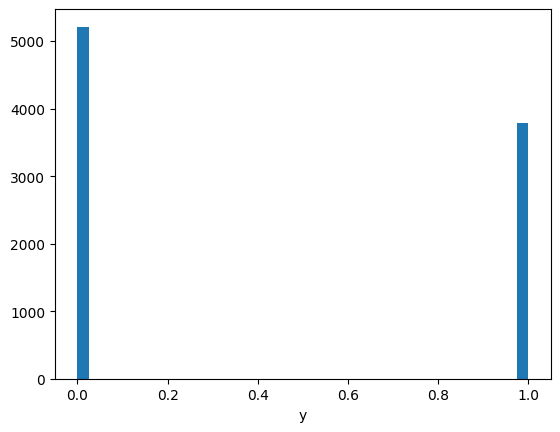

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

y = np.array(data["y"])

plt.hist(y, bins=40)
plt.xlabel("y")
plt.show()

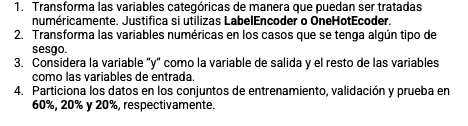



---

Empieza análisis. Se conforman los conjuntos de entrada y salida X y Y.

---



In [11]:
#Empieza análisis. Se conforman los conjuntos de entrada y salida X y Y.

X = data.drop('y', axis=1)

Y = data['y']

X = X.values

Y = Y.values



---
Se establece una función llamada **InitSplit** para llamarla varias veces de acuerdo a diversos porcentajes de cada subconjunto. Dentro de esta función se inicializan los subconjuntos de datos para entrenar, probar y validar.

Dentro de esta función se lleva a cabo la última clase de preprocesamiento para estandarizar los valores globales para evitar los sesgos.

---




In [12]:
#Se inicializan las particiones para entrenar, probar y validar

import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score # Importa la función accuracy_score
from sklearn.preprocessing import StandardScaler

def InitSplit(population_size, test_size, validation_size):

  x_train_validation, x_test, y_train_validation, y_test = \
    train_test_split(X, Y, test_size = test_size/population_size, random_state=42)

  x_train, x_validation, y_train, y_validation = \
   train_test_split(x_train_validation, y_train_validation, test_size=(validation_size/(population_size - test_size)), random_state=42)

  #Scale features
  scaler = StandardScaler()
  scaler.fit(x_train)
  x_train = scaler.transform(x_train)
  x_test = scaler.transform(x_test)
  x_validation = scaler.transform(x_validation)

  print("Dimensión X_train:\t\t", x_train.shape)
  print("Dimensión X_validation:\t\t", x_validation.shape)
  print("Dimension X_test:\t\t", x_test.shape)

  print("\nDimensión Y_train:\t\t", y_train.shape)
  print("Dimensión Y_validation:\t\t", y_validation.shape)
  print("Dimensión Y_test:\t\t", y_test.shape)

  return (x_train, x_test, x_validation, y_train, y_test, y_validation, x_train_validation, y_train_validation)



---

Se define una función llamada **LRegression** que ejecuta una Regresión Logística para llamarla varias veces de acuerdo a diversos porcentajes de cada subconjunto de datos y diferentes hiperparámetros.

---




In [13]:
#Funcion de Regresión Logística

def LRegression(x_train, y_train, max_iter, c, solver, random_state):

  modelo_RL = LogisticRegression( C=c, solver=solver, max_iter=max_iter, random_state=random_state )
  modelo_RL.fit( x_train, y_train )

  return (modelo_RL)



---
Se define una función llamada **MeanLRegression** para llamarla varias veces de acuerdo a diversos porcentajes de cada subconjunto y diversos hiperparámetros. Dentro de esta función se itera *n* veces para sacar el promedio de Regresión Logística y compararlo con un valor individual con el promedio de *n* iteraciones en donde no se establece **random_state** para que no siempre nos arroje el mismo valor.

---




In [14]:
#Funcion de Regresión Logística Promedio. Se itera "n" veces para obtener el promedio

def MeanLRegression(x_train, x_validation, y_train, y_validation, x_train_validation, y_train_validation, max_iter, c, solver):

  exactitud = []

  n = 10

  for k in range(0,n):
    x_train, x_validation, y_train, y_validation = \
    train_test_split(x_train_validation, y_train_validation, test_size=(VALIDATION_SIZE/(POPULATION_SIZE - TEST_SIZE)), random_state=42)

    modelo_RL = LRegression(x_train, y_train, max_iter, c, solver, None ) #Aqui no se debe ejecutar con random_state

    # veamos cómo se comportan ahora en el conjunto de validación:
    exactitud.append(modelo_RL.score(x_validation, y_validation))

  return(exactitud)




---
A continuación se define la funcion de **Confusion_Matrix** para sacar cualquier Matriz de Confusión de un modelo determinado a partir de los subconjuntos de prueba.

---




In [15]:
from sklearn.metrics import confusion_matrix

def Confusion_Matrix(model, x_test, y_test):
  pr = model.predict(x_test)

  conf_matrix = confusion_matrix(y_test, pr)
  return(conf_matrix)

In [16]:
#from sklearn.metrics import plot_confusion_matrix --Older version, deprecated

#plot_confusion_matrix(model, X_test, y_test, labels=[0,1]) --Older version, deprecated

#!pip install scikit-learn --upgrade
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def Draw_Confusion_Matrix(model, x_test, y_test):
  # Instead of using plot_confusion_matrix, use the following:
  cm = confusion_matrix(y_test, model.predict(x_test), labels=[0,1])
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
  disp.plot()
  plt.show()

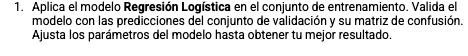

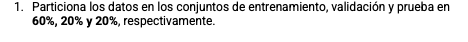



---
El bloque de **software** siguiente define los valores globales de la **primera** prueba que es la que pide el reto. Dentro de estos valores se establecen ademas los primeros hiperparámetros que usaremos en estas pruebas.

---




In [17]:
#Variables globales de la primera prueba

POPULATION_SIZE = 9000
TEST_SIZE = 1800
VALIDATION_SIZE = 1800
TRAIN_SIZE = POPULATION_SIZE - (TEST_SIZE + VALIDATION_SIZE)
MAX_ITER = 800
C = 0.1
SOLVER = 'newton-cg'

In [18]:
x_train, x_test, x_validation, y_train, y_test, y_validation, x_train_validation, y_train_validation = InitSplit(POPULATION_SIZE, TEST_SIZE, VALIDATION_SIZE)

Dimensión X_train:		 (5400, 16)
Dimensión X_validation:		 (1800, 16)
Dimension X_test:		 (1800, 16)

Dimensión Y_train:		 (5400,)
Dimensión Y_validation:		 (1800,)
Dimensión Y_test:		 (1800,)




---


A continuación se ejecuta la Regresión Logística individual y luego la Regresión Lineal Promedio para comparar los valores. Esta ejecución es un ejercicio para comparar un valor puntual de la exactitud (**accuracy**) con un valor promedio de la exactitud (**accuracy**) de la **primera** prueba con los valores sugeridos en el reto.


---



In [ ]:
modelo_RL = LRegression(x_train, y_train, MAX_ITER, C, SOLVER, 42)

print("Exactitud (accuracy) con el conjunto de Validación = ", \
      modelo_RL.score(x_validation, y_validation))

# Validation
y_pred_val = modelo_RL.predict(x_validation)
val_accuracy = accuracy_score(y_validation, y_pred_val)

# Testing and confusion matrix
y_pred_test = modelo_RL.predict(x_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
conf_matrix = confusion_matrix(y_test, y_pred_test)

print("Validation Accuracy: {:.2f}%".format(val_accuracy * 100))
print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))
print("Confusion Matrix:\n", conf_matrix)

exactitud = MeanLRegression(x_train, x_validation, y_train, y_validation, x_train_validation, y_train_validation, MAX_ITER, C, SOLVER)

print("Exactitud (Accuracy) promedio:", np.mean(exactitud))
print("y desviación estándar:", np.std(exactitud)  )

Exactitud (accuracy) con el conjunto de Validación =  0.7938888888888889
Validation Accuracy: 79.39%
Test Accuracy: 80.33%
Confusion Matrix:
 [[886 129]
 [225 560]]
Exactitud (Accuracy) promedio: 0.7916666666666667
y desviación estándar: 1.1102230246251565e-16


In [ ]:
conf_matrix = Confusion_Matrix(modelo_RL, x_test, y_test)
conf_matrix_acc = (conf_matrix[0][0]+conf_matrix[1][1])/np.sum(conf_matrix)
print("Confusion Matrix Accuracy: {:.2f}%".format( conf_matrix_acc*100))

Confusion Matrix Accuracy: 80.33%




---
Se muestra la exactitud (accuracy) proveniente del método **score**  contra la exactitud (accuracy) proveniente de la **Matriz de Confusión**. La diferencia radica en que la exactitud de **score** fue obtenida a partir del conjunto de entrenamiento **x_train** y esto de alguna forma está sesgado debido a que se obtiene a partir de la fase de entrenamiento en tanto que la exactitud de la **Matriz de Confusión** toma en cuenta los 4 casos de predicción que puede haber en una matriz de un modelo de salida de una variable y que en este caso es el porcentaje de predicciones correctas del tipo Verdadero Negativo (**VN**) y Verdadero Positivo (**VP**) que son aquellas predicciones realizadas correctamente por el modelo.

El caso anterior muestra una exactitud de **79.16%** (model.score) vs **80.33%** (Matriz de Confusión).

---






---

El bloque de **software** siguiente define los valores globales de la **segunda** prueba que ajusta los hiperparámetros de la **primera** prueba con los tamaños modificados de los subconjuntos de datos de entrenamiento, prueba y validación (si es que es posible). Dentro de estos valores se establecen ademas los nuevos hiperparámetros que usaremos en esta prueba. El objetivo pretende mejorar los valores obtenidos en la **primera** prueba.

---



In [ ]:
#Variables globales de la segunda prueba con movimiento de hiperparámetros

POPULATION_SIZE = 9000
TEST_SIZE = 1800
VALIDATION_SIZE = 1800
TRAIN_SIZE = POPULATION_SIZE - (TEST_SIZE + VALIDATION_SIZE)
MAX_ITER = 200
C = 0.5
SOLVER = 'liblinear'

In [ ]:
x_train, x_test, x_validation, y_train, y_test, y_validation, x_train_validation, y_train_validation = InitSplit(POPULATION_SIZE, TEST_SIZE, VALIDATION_SIZE)

Dimensión X_train:		 (5400, 16)
Dimensión X_validation:		 (1800, 16)
Dimension X_test:		 (1800, 16)

Dimensión Y_train:		 (5400,)
Dimensión Y_validation:		 (1800,)
Dimensión Y_test:		 (1800,)




---
A continuación se ejecuta la Regresión Logística individual y luego la Regresión Lineal Promedio para comparar los valores. Esta ejecución es un ejercicio para comparar un valor puntual de la exactitud (**accuracy**) con un valor promedio de la exactitud (**accuracy**) de la **segunda** prueba contra los valores sugeridos en el reto.

---




In [ ]:
modelo_RL = LRegression(x_train, y_train, MAX_ITER, C, SOLVER, 42)

print("Exactitud (accuracy) con el conjunto de Validación = ", \
      modelo_RL.score(x_validation, y_validation))

# Validation
y_pred_val = modelo_RL.predict(x_validation)
val_accuracy = accuracy_score(y_validation, y_pred_val)

# Testing and confusion matrix
y_pred_test = modelo_RL.predict(x_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
conf_matrix = confusion_matrix(y_test, y_pred_test)

print("Validation Accuracy: {:.2f}%".format(val_accuracy * 100))
print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))
print("Confusion Matrix:\n", conf_matrix)

exactitud = MeanLRegression(x_train, x_validation, y_train, y_validation, x_train_validation, y_train_validation, MAX_ITER, C, SOLVER)

print("Exactitud (Accuracy) promedio:", np.mean(exactitud))
print("y desviación estándar:", np.std(exactitud)  )

Exactitud (accuracy) con el conjunto de Validación =  0.7933333333333333
Validation Accuracy: 79.33%
Test Accuracy: 80.22%
Confusion Matrix:
 [[884 131]
 [225 560]]
Exactitud (Accuracy) promedio: 0.7894444444444444
y desviación estándar: 0.0


In [ ]:
conf_matrix = Confusion_Matrix(modelo_RL, x_test, y_test)
conf_matrix_acc = (conf_matrix[0][0]+conf_matrix[1][1])/np.sum(conf_matrix)
print("Confusion Matrix Accuracy: {:.2f}%".format( conf_matrix_acc*100))

Confusion Matrix Accuracy: 80.22%




---
Se utiliza el modelo recien entrenado de Regresión Logística.

---




In [ ]:
model = modelo_RL



---
A continuación se utiliza la matriz de Confusión para sacar la relación de predicciones correctas vs predicciones erróneas.

---




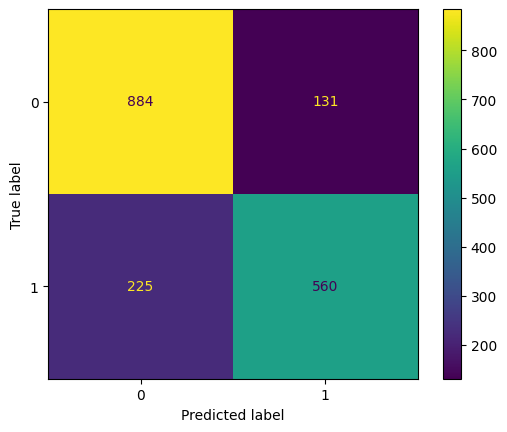

In [ ]:
Draw_Confusion_Matrix(modelo_RL, x_test, y_test)



---
En esta **segunda** prueba, el valor de la suma **884+560** entre todas las predicciones, representan la suma de los valores de la matriz de confusión de Verdadero Negativo (**VN**) mas Verdadero Positivo (**VP**) que son aquellas predicciones realizadas correctamente por el modelo. Esto mejora el modelo respecto a la **primera** prueba debido a que se reestructuraron los subconjuntos de entrenamiento, pruebas y validación ademas de un substancial cambio en los hiperparámetros. En este caso las predicciones correctas tienen una razón de **80.22%** del total de predicciones.

---






---
Se utiliza la malla (**Grid**) GridSearchCV para sacar los mejores hiperparámetros para analizar un modelo con Regresión Logística.

---




In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Define a pipeline to include preprocessing (e.g., scaling) and the classifier
pipeline = Pipeline([
#    ('scaler', StandardScaler()),          #Se omite el StandardScaler porque los datos ya vienen escalados
    ('classifier', LogisticRegression(random_state=42))
])

# Define the parameter grid to search
param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'classifier__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],  # Algorithms for optimization
    'classifier__max_iter': [100, 200, 300]  # Maximum number of iterations for convergence
}

# Create the GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid, cv=5, verbose=1, scoring='accuracy')

# Example: Assuming X_train and y_train are your data and labels respectively
# Fit GridSearchCV
grid_search.fit(x_train, y_train)

# Best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)
# Best model
best_model = grid_search.best_estimator_

# Optionally, you can now evaluate 'best_model' on your test data

print(grid_search)
print("Los mejores valores encontrados son %s con un score de %0.2f" % (grid_search.best_params_, grid_search.best_score_))
print(grid_search.score (x_test, y_test))

Fitting 5 folds for each of 75 candidates, totalling 375 fits
Best hyperparameters: {'classifier__C': 1, 'classifier__max_iter': 100, 'classifier__solver': 'newton-cg'}
GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('classifier',
                                        LogisticRegression(random_state=42))]),
             param_grid={'classifier__C': [0.01, 0.1, 1, 10, 100],
                         'classifier__max_iter': [100, 200, 300],
                         'classifier__solver': ['newton-cg', 'lbfgs',
                                                'liblinear', 'sag', 'saga']},
             scoring='accuracy', verbose=1)
Los mejores valores encontrados son {'classifier__C': 1, 'classifier__max_iter': 100, 'classifier__solver': 'newton-cg'} con un score de 0.80
0.8022222222222222




---
A continuación trataremos de mejorar mediante los valores encontrados en la malla (**Grid**) los mejores hiperparámetros para la Regresión Logística.

---




In [ ]:
#Variables globales de la tercera prueba con mejora de hiperparámetros a través de Grid

POPULATION_SIZE = 9000
TEST_SIZE = 1800
VALIDATION_SIZE = 1800
TRAIN_SIZE = POPULATION_SIZE - (TEST_SIZE + VALIDATION_SIZE)
MAX_ITER = 100
C = 1.0
SOLVER = 'newton-cg'

In [ ]:
x_train, x_test, x_validation, y_train, y_test, y_validation, x_train_validation, y_train_validation = InitSplit(POPULATION_SIZE, TEST_SIZE, VALIDATION_SIZE)

Dimensión X_train:		 (5400, 16)
Dimensión X_validation:		 (1800, 16)
Dimension X_test:		 (1800, 16)

Dimensión Y_train:		 (5400,)
Dimensión Y_validation:		 (1800,)
Dimensión Y_test:		 (1800,)


In [ ]:
modelo_RL = LRegression(x_train, y_train, MAX_ITER, C, SOLVER, 42)

print("Exactitud (accuracy) con el conjunto de Validación = ", \
      modelo_RL.score(x_validation, y_validation))

# Validation
y_pred_val = modelo_RL.predict(x_validation)
val_accuracy = accuracy_score(y_validation, y_pred_val)

# Testing and confusion matrix
y_pred_test = modelo_RL.predict(x_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
conf_matrix = confusion_matrix(y_test, y_pred_test)

print("Validation Accuracy: {:.2f}%".format(val_accuracy * 100))
print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))
print("Confusion Matrix:\n", conf_matrix)

exactitud = MeanLRegression(x_train, x_validation, y_train, y_validation, x_train_validation, y_train_validation, MAX_ITER, C, SOLVER)

print("Exactitud (Accuracy) promedio:", np.mean(exactitud))
print("y desviación estándar:", np.std(exactitud)  )

Exactitud (accuracy) con el conjunto de Validación =  0.7933333333333333
Validation Accuracy: 79.33%
Test Accuracy: 80.22%
Confusion Matrix:
 [[884 131]
 [225 560]]
Exactitud (Accuracy) promedio: 0.7933333333333332
y desviación estándar: 1.1102230246251565e-16


In [ ]:
conf_matrix = Confusion_Matrix(modelo_RL, x_test, y_test)
conf_matrix_acc = (conf_matrix[0][0]+conf_matrix[1][1])/np.sum(conf_matrix)
print("Confusion Matrix Accuracy: {:.2f}%".format( conf_matrix_acc*100))

Confusion Matrix Accuracy: 80.22%




---
Se utiliza el modelo recien entrenado de Regresión Logística.

---




In [ ]:
model = modelo_RL



---
A continuación se utiliza la matriz de Confusión para sacar la relación de predicciones correctas vs predicciones erróneas.

---




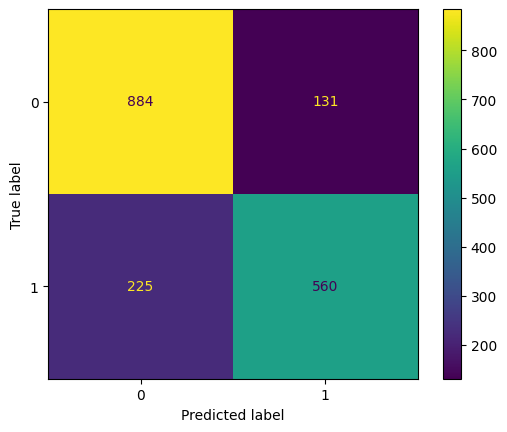

In [ ]:
Draw_Confusion_Matrix(modelo_RL, x_test, y_test)



---
El valor de **80.22%** de la **tercera** prueba (**GridSearchCV**) iguala el **80.22%** encontrado en la **segunda** prueba.

---




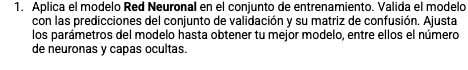



---
Se define una función llamada **MLP_Classifier** que ejecuta una Red Neuronal de Perceptrón o Multilayer Perceptron Classifier para llamarla varias veces de acuerdo a diversos porcentajes de cada subconjunto de datos y diferentes hiperparámetros.

---


In [ ]:
from sklearn.neural_network import MLPClassifier

def MLP_Classifier(x_train, x_validation, y_train, y_validation, hidden_layer_sizes, max_iter):

  #modelo_NN = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, max_iter=max_iter, random_state=42)
  modelo_NN = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes,
    max_iter=max_iter,
    activation='relu',
    learning_rate_init = 0.01,
    solver = 'adam',
    alpha=0.4,
    random_state=42)
  modelo_NN.fit(x_train, y_train)

  return(modelo_NN)



---
Se ejecuta la **primera** prueba del clasificador **MLPClassifier** con los parámetros **hidden_layer_sizes**=(40, 40), **max_iter**=400, **random_state**=42

---




In [ ]:
from sklearn.neural_network import MLPClassifier

#modelo_NN = MLPClassifier(hidden_layer_sizes=(40, 40), max_iter=400, random_state=42)
modelo_NN = MLPClassifier(hidden_layer_sizes=(40,40),
    max_iter=400,
    activation='relu',
    learning_rate_init = 0.01,
    solver = 'adam',
    alpha=0.4,
    random_state=42)
modelo_NN.fit(x_train, y_train)

print(modelo_NN.score (x_validation, y_validation))

0.8211111111111111




---
Se ejecuta la función **MLP_Classifier** con los parámetros **hidden_layer_sizes**=(40, 40), **max_iter**=400. Se espera que el resultado sea similar al bloque de **MLPClassifier**. El objetivo de esta ejecución solo es comprobar que la llamada al clasificador neuronal funciona igual que la ejecución en un bloque de código anónimo.

---




In [ ]:
from sklearn.neural_network import MLPClassifier

modelo_NN = MLP_Classifier(x_train, x_validation, y_train, y_validation, (40,40), 400)

print(modelo_NN.score (x_validation, y_validation))

0.8211111111111111




---
Se ejecuta la **segunda** prueba de la función **MLP_Classifier** con otros parámetros **hidden_layer_sizes**=(91, 91), **max_iter**=400 para tratar de mejorar el promedio de la **primera** ejecución.

---




In [ ]:
from sklearn.neural_network import MLPClassifier

modelo_NN = MLP_Classifier(x_train, x_validation, y_train, y_validation, (91, 91), 400)

print(modelo_NN.score (x_validation, y_validation))

0.8266666666666667




---
El porcentaje de exactitud (**accuracy**) de **82.67%** de la **segunda** prueba, mejora el **82.1%** de la **primera** prueba.

---




In [ ]:
conf_matrix = Confusion_Matrix(modelo_NN, x_validation, y_validation)
conf_matrix_acc = (conf_matrix[0][0]+conf_matrix[1][1])/np.sum(conf_matrix)
print("Confusion Matrix Accuracy: {:.2f}%".format( conf_matrix_acc*100))

Confusion Matrix Accuracy: 82.67%


In [ ]:
print(conf_matrix)

[[870 165]
 [147 618]]



---
El valor de la suma **870+618** entre todas las predicciones, representan la suma de los valores de la matriz de confusión de Verdadero Negativo (**VN**) mas Verdadero Positivo (**VP**) que son aquellas predicciones realizadas correctamente por el modelo.

---






---
Se utiliza el modelo recién entrenado de MLP Classifier.

---




In [ ]:
model = modelo_NN

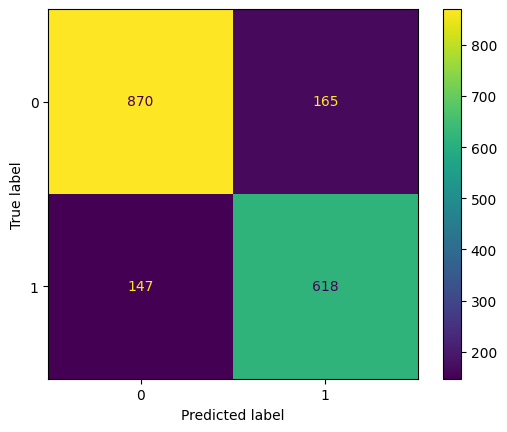

In [ ]:
Draw_Confusion_Matrix(modelo_NN, x_validation, y_validation)



---
El valor de la suma **870+618** entre todas las predicciones, representan la suma de los valores de la matriz de confusión de Verdadero Negativo (**VN**) mas Verdadero Positivo (**VP**) que son aquellas predicciones realizadas correctamente por el modelo. Esto concuerda con la salida de la función de **MLPClassifier**.

---






---
Se utiliza la malla (**Grid**) **GridSearchCV** para sacar los mejores hiperparámetros para analizar un modelo con **MLPClassifier**.

---




In [ ]:
#Uso de malla (Grid) para sacar los mejores hiperparámetros

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Define a pipeline to include preprocessing (e.g., scaling) and the classifier
pipeline = Pipeline([
#    ('scaler', StandardScaler()),
    ('mlp', MLPClassifier(random_state=42))
])

# Define the parameter grid to search
param_grid = {
    'mlp__hidden_layer_sizes': [(40, 40), (91, 91)],  # Different configurations of hidden layers
    'mlp__activation': ['tanh', 'relu'],  # Activation functions
    'mlp__solver': ['sgd', 'adam'],  # Optimizers
    'mlp__alpha': [0.3, 0.4],  # L2 penalty (regularization term)
    'mlp__learning_rate_init': [0.001, 0.01],  # Initial learning rate
    'mlp__max_iter': [400, 500]  # Max number of epochs
}

# Create the GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid, cv=5, verbose=3, scoring='accuracy')

# Example: Assuming X_train and y_train are your data and labels respectively
# Fit GridSearchCV
try:
  grid_search.fit(x_train, y_train)
except Exception as e:
  print("Error during GridSearchCV:", str(e))

# Best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)
model = MLPClassifier(hidden_layer_sizes=grid_search.best_params_['mlp__hidden_layer_sizes'],
                      activation=grid_search.best_params_['mlp__activation'],
                      solver=grid_search.best_params_['mlp__solver'],
                      alpha=grid_search.best_params_['mlp__alpha'],
                      learning_rate_init=grid_search.best_params_['mlp__learning_rate_init'],
                      max_iter=grid_search.best_params_['mlp__max_iter'],
                      random_state=42)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with the best Hyperparameters (test):", accuracy)
y_pred = model.predict(x_validation)
accuracy = accuracy_score(y_validation, y_pred)
print("Accuracy with the best Hyperparameters (validation):", accuracy)

# Best model
best_model = grid_search.best_estimator_

# Optionally, you can now evaluate 'best_model' on your test data

Fitting 5 folds for each of 64 candidates, totalling 320 fits


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END mlp__activation=tanh, mlp__alpha=0.3, mlp__hidden_layer_sizes=(40, 40), mlp__learning_rate_init=0.001, mlp__max_iter=400, mlp__solver=sgd;, score=0.810 total time=  15.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END mlp__activation=tanh, mlp__alpha=0.3, mlp__hidden_layer_sizes=(40, 40), mlp__learning_rate_init=0.001, mlp__max_iter=400, mlp__solver=sgd;, score=0.819 total time=  15.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END mlp__activation=tanh, mlp__alpha=0.3, mlp__hidden_layer_sizes=(40, 40), mlp__learning_rate_init=0.001, mlp__max_iter=400, mlp__solver=sgd;, score=0.805 total time=  15.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END mlp__activation=tanh, mlp__alpha=0.3, mlp__hidden_layer_sizes=(40, 40), mlp__learning_rate_init=0.001, mlp__max_iter=400, mlp__solver=sgd;, score=0.819 total time=  15.3s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END mlp__activation=tanh, mlp__alpha=0.3, mlp__hidden_layer_sizes=(40, 40), mlp__learning_rate_init=0.001, mlp__max_iter=400, mlp__solver=sgd;, score=0.804 total time=  15.6s
[CV 1/5] END mlp__activation=tanh, mlp__alpha=0.3, mlp__hidden_layer_sizes=(40, 40), mlp__learning_rate_init=0.001, mlp__max_iter=400, mlp__solver=adam;, score=0.797 total time=  11.2s
[CV 2/5] END mlp__activation=tanh, mlp__alpha=0.3, mlp__hidden_layer_sizes=(40, 40), mlp__learning_rate_init=0.001, mlp__max_iter=400, mlp__solver=adam;, score=0.818 total time=  10.2s
[CV 3/5] END mlp__activation=tanh, mlp__alpha=0.3, mlp__hidden_layer_sizes=(40, 40), mlp__learning_rate_init=0.001, mlp__max_iter=400, mlp__solver=adam;, score=0.816 total time=   6.6s
[CV 4/5] END mlp__activation=tanh, mlp__alpha=0.3, mlp__hidden_layer_sizes=(40, 40), mlp__learning_rate_init=0.001, mlp__max_iter=400, mlp__solver=adam;, score=0.827 total time=  10.4s
[CV 5/5] END mlp__activation=tanh, mlp__alpha=0.3, mlp__hidden_layer_sizes=(

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END mlp__activation=tanh, mlp__alpha=0.3, mlp__hidden_layer_sizes=(40, 40), mlp__learning_rate_init=0.001, mlp__max_iter=500, mlp__solver=sgd;, score=0.813 total time=  18.8s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END mlp__activation=tanh, mlp__alpha=0.3, mlp__hidden_layer_sizes=(40, 40), mlp__learning_rate_init=0.001, mlp__max_iter=500, mlp__solver=sgd;, score=0.824 total time=  19.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END mlp__activation=tanh, mlp__alpha=0.3, mlp__hidden_layer_sizes=(40, 40), mlp__learning_rate_init=0.001, mlp__max_iter=500, mlp__solver=sgd;, score=0.807 total time=  18.8s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END mlp__activation=tanh, mlp__alpha=0.3, mlp__hidden_layer_sizes=(40, 40), mlp__learning_rate_init=0.001, mlp__max_iter=500, mlp__solver=sgd;, score=0.819 total time=  19.3s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END mlp__activation=tanh, mlp__alpha=0.3, mlp__hidden_layer_sizes=(40, 40), mlp__learning_rate_init=0.001, mlp__max_iter=500, mlp__solver=sgd;, score=0.806 total time=  18.8s
[CV 1/5] END mlp__activation=tanh, mlp__alpha=0.3, mlp__hidden_layer_sizes=(40, 40), mlp__learning_rate_init=0.001, mlp__max_iter=500, mlp__solver=adam;, score=0.797 total time=  11.4s
[CV 2/5] END mlp__activation=tanh, mlp__alpha=0.3, mlp__hidden_layer_sizes=(40, 40), mlp__learning_rate_init=0.001, mlp__max_iter=500, mlp__solver=adam;, score=0.818 total time=  10.7s
[CV 3/5] END mlp__activation=tanh, mlp__alpha=0.3, mlp__hidden_layer_sizes=(40, 40), mlp__learning_rate_init=0.001, mlp__max_iter=500, mlp__solver=adam;, score=0.816 total time=   5.9s
[CV 4/5] END mlp__activation=tanh, mlp__alpha=0.3, mlp__hidden_layer_sizes=(40, 40), mlp__learning_rate_init=0.001, mlp__max_iter=500, mlp__solver=adam;, score=0.827 total time=  10.5s
[CV 5/5] END mlp__activation=tanh, mlp__alpha=0.3, mlp__hidden_layer_sizes=(

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END mlp__activation=tanh, mlp__alpha=0.3, mlp__hidden_layer_sizes=(40, 40), mlp__learning_rate_init=0.01, mlp__max_iter=400, mlp__solver=sgd;, score=0.792 total time=  15.1s
[CV 2/5] END mlp__activation=tanh, mlp__alpha=0.3, mlp__hidden_layer_sizes=(40, 40), mlp__learning_rate_init=0.01, mlp__max_iter=400, mlp__solver=sgd;, score=0.820 total time=  10.2s
[CV 3/5] END mlp__activation=tanh, mlp__alpha=0.3, mlp__hidden_layer_sizes=(40, 40), mlp__learning_rate_init=0.01, mlp__max_iter=400, mlp__solver=sgd;, score=0.813 total time=  10.8s
[CV 4/5] END mlp__activation=tanh, mlp__alpha=0.3, mlp__hidden_layer_sizes=(40, 40), mlp__learning_rate_init=0.01, mlp__max_iter=400, mlp__solver=sgd;, score=0.827 total time=  14.5s
[CV 5/5] END mlp__activation=tanh, mlp__alpha=0.3, mlp__hidden_layer_sizes=(40, 40), mlp__learning_rate_init=0.01, mlp__max_iter=400, mlp__solver=sgd;, score=0.799 total time=  11.3s
[CV 1/5] END mlp__activation=tanh, mlp__alpha=0.3, mlp__hidden_layer_sizes=(40, 40), 

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END mlp__activation=tanh, mlp__alpha=0.3, mlp__hidden_layer_sizes=(91, 91), mlp__learning_rate_init=0.001, mlp__max_iter=400, mlp__solver=sgd;, score=0.806 total time=  42.6s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END mlp__activation=tanh, mlp__alpha=0.3, mlp__hidden_layer_sizes=(91, 91), mlp__learning_rate_init=0.001, mlp__max_iter=400, mlp__solver=sgd;, score=0.825 total time=  45.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END mlp__activation=tanh, mlp__alpha=0.3, mlp__hidden_layer_sizes=(91, 91), mlp__learning_rate_init=0.001, mlp__max_iter=400, mlp__solver=sgd;, score=0.805 total time=  42.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END mlp__activation=tanh, mlp__alpha=0.3, mlp__hidden_layer_sizes=(91, 91), mlp__learning_rate_init=0.001, mlp__max_iter=400, mlp__solver=sgd;, score=0.813 total time=  42.6s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END mlp__activation=tanh, mlp__alpha=0.3, mlp__hidden_layer_sizes=(91, 91), mlp__learning_rate_init=0.001, mlp__max_iter=400, mlp__solver=sgd;, score=0.816 total time=  43.2s
[CV 1/5] END mlp__activation=tanh, mlp__alpha=0.3, mlp__hidden_layer_sizes=(91, 91), mlp__learning_rate_init=0.001, mlp__max_iter=400, mlp__solver=adam;, score=0.789 total time=  20.7s
[CV 2/5] END mlp__activation=tanh, mlp__alpha=0.3, mlp__hidden_layer_sizes=(91, 91), mlp__learning_rate_init=0.001, mlp__max_iter=400, mlp__solver=adam;, score=0.829 total time=  19.1s
[CV 3/5] END mlp__activation=tanh, mlp__alpha=0.3, mlp__hidden_layer_sizes=(91, 91), mlp__learning_rate_init=0.001, mlp__max_iter=400, mlp__solver=adam;, score=0.804 total time=  21.0s
[CV 4/5] END mlp__activation=tanh, mlp__alpha=0.3, mlp__hidden_layer_sizes=(91, 91), mlp__learning_rate_init=0.001, mlp__max_iter=400, mlp__solver=adam;, score=0.812 total time=  27.7s
[CV 5/5] END mlp__activation=tanh, mlp__alpha=0.3, mlp__hidden_layer_sizes=(

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END mlp__activation=tanh, mlp__alpha=0.3, mlp__hidden_layer_sizes=(91, 91), mlp__learning_rate_init=0.001, mlp__max_iter=500, mlp__solver=sgd;, score=0.808 total time=  52.5s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END mlp__activation=tanh, mlp__alpha=0.3, mlp__hidden_layer_sizes=(91, 91), mlp__learning_rate_init=0.001, mlp__max_iter=500, mlp__solver=sgd;, score=0.831 total time=  52.5s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END mlp__activation=tanh, mlp__alpha=0.3, mlp__hidden_layer_sizes=(91, 91), mlp__learning_rate_init=0.001, mlp__max_iter=500, mlp__solver=sgd;, score=0.808 total time=  52.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END mlp__activation=tanh, mlp__alpha=0.3, mlp__hidden_layer_sizes=(91, 91), mlp__learning_rate_init=0.001, mlp__max_iter=500, mlp__solver=sgd;, score=0.819 total time=  52.3s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END mlp__activation=tanh, mlp__alpha=0.3, mlp__hidden_layer_sizes=(91, 91), mlp__learning_rate_init=0.001, mlp__max_iter=500, mlp__solver=sgd;, score=0.811 total time=  52.4s
[CV 1/5] END mlp__activation=tanh, mlp__alpha=0.3, mlp__hidden_layer_sizes=(91, 91), mlp__learning_rate_init=0.001, mlp__max_iter=500, mlp__solver=adam;, score=0.789 total time=  18.3s
[CV 2/5] END mlp__activation=tanh, mlp__alpha=0.3, mlp__hidden_layer_sizes=(91, 91), mlp__learning_rate_init=0.001, mlp__max_iter=500, mlp__solver=adam;, score=0.829 total time=  20.7s
[CV 3/5] END mlp__activation=tanh, mlp__alpha=0.3, mlp__hidden_layer_sizes=(91, 91), mlp__learning_rate_init=0.001, mlp__max_iter=500, mlp__solver=adam;, score=0.804 total time=  21.1s
[CV 4/5] END mlp__activation=tanh, mlp__alpha=0.3, mlp__hidden_layer_sizes=(91, 91), mlp__learning_rate_init=0.001, mlp__max_iter=500, mlp__solver=adam;, score=0.812 total time=  27.4s
[CV 5/5] END mlp__activation=tanh, mlp__alpha=0.3, mlp__hidden_layer_sizes=(

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END mlp__activation=tanh, mlp__alpha=0.3, mlp__hidden_layer_sizes=(91, 91), mlp__learning_rate_init=0.01, mlp__max_iter=400, mlp__solver=sgd;, score=0.822 total time=  43.4s
[CV 3/5] END mlp__activation=tanh, mlp__alpha=0.3, mlp__hidden_layer_sizes=(91, 91), mlp__learning_rate_init=0.01, mlp__max_iter=400, mlp__solver=sgd;, score=0.816 total time=  34.3s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END mlp__activation=tanh, mlp__alpha=0.3, mlp__hidden_layer_sizes=(91, 91), mlp__learning_rate_init=0.01, mlp__max_iter=400, mlp__solver=sgd;, score=0.816 total time=  44.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END mlp__activation=tanh, mlp__alpha=0.3, mlp__hidden_layer_sizes=(91, 91), mlp__learning_rate_init=0.01, mlp__max_iter=400, mlp__solver=sgd;, score=0.793 total time=  41.5s
[CV 1/5] END mlp__activation=tanh, mlp__alpha=0.3, mlp__hidden_layer_sizes=(91, 91), mlp__learning_rate_init=0.01, mlp__max_iter=400, mlp__solver=adam;, score=0.787 total time=   9.1s
[CV 2/5] END mlp__activation=tanh, mlp__alpha=0.3, mlp__hidden_layer_sizes=(91, 91), mlp__learning_rate_init=0.01, mlp__max_iter=400, mlp__solver=adam;, score=0.830 total time=   8.3s
[CV 3/5] END mlp__activation=tanh, mlp__alpha=0.3, mlp__hidden_layer_sizes=(91, 91), mlp__learning_rate_init=0.01, mlp__max_iter=400, mlp__solver=adam;, score=0.826 total time=  10.7s
[CV 4/5] END mlp__activation=tanh, mlp__alpha=0.3, mlp__hidden_layer_sizes=(91, 91), mlp__learning_rate_init=0.01, mlp__max_iter=400, mlp__solver=adam;, score=0.827 total time=   7.0s
[CV 5/5] END mlp__activation=tanh, mlp__alpha=0.3, mlp__hidden_layer_sizes=(91, 9

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END mlp__activation=tanh, mlp__alpha=0.4, mlp__hidden_layer_sizes=(40, 40), mlp__learning_rate_init=0.001, mlp__max_iter=400, mlp__solver=sgd;, score=0.808 total time=  15.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END mlp__activation=tanh, mlp__alpha=0.4, mlp__hidden_layer_sizes=(40, 40), mlp__learning_rate_init=0.001, mlp__max_iter=400, mlp__solver=sgd;, score=0.819 total time=  15.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END mlp__activation=tanh, mlp__alpha=0.4, mlp__hidden_layer_sizes=(40, 40), mlp__learning_rate_init=0.001, mlp__max_iter=400, mlp__solver=sgd;, score=0.805 total time=  14.8s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END mlp__activation=tanh, mlp__alpha=0.4, mlp__hidden_layer_sizes=(40, 40), mlp__learning_rate_init=0.001, mlp__max_iter=400, mlp__solver=sgd;, score=0.818 total time=  14.8s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END mlp__activation=tanh, mlp__alpha=0.4, mlp__hidden_layer_sizes=(40, 40), mlp__learning_rate_init=0.001, mlp__max_iter=400, mlp__solver=sgd;, score=0.809 total time=  14.9s
[CV 1/5] END mlp__activation=tanh, mlp__alpha=0.4, mlp__hidden_layer_sizes=(40, 40), mlp__learning_rate_init=0.001, mlp__max_iter=400, mlp__solver=adam;, score=0.795 total time=  11.2s
[CV 2/5] END mlp__activation=tanh, mlp__alpha=0.4, mlp__hidden_layer_sizes=(40, 40), mlp__learning_rate_init=0.001, mlp__max_iter=400, mlp__solver=adam;, score=0.834 total time=   7.7s
[CV 3/5] END mlp__activation=tanh, mlp__alpha=0.4, mlp__hidden_layer_sizes=(40, 40), mlp__learning_rate_init=0.001, mlp__max_iter=400, mlp__solver=adam;, score=0.815 total time=   5.8s
[CV 4/5] END mlp__activation=tanh, mlp__alpha=0.4, mlp__hidden_layer_sizes=(40, 40), mlp__learning_rate_init=0.001, mlp__max_iter=400, mlp__solver=adam;, score=0.829 total time=  12.0s
[CV 5/5] END mlp__activation=tanh, mlp__alpha=0.4, mlp__hidden_layer_sizes=(

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END mlp__activation=tanh, mlp__alpha=0.4, mlp__hidden_layer_sizes=(40, 40), mlp__learning_rate_init=0.001, mlp__max_iter=500, mlp__solver=sgd;, score=0.815 total time=  19.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END mlp__activation=tanh, mlp__alpha=0.4, mlp__hidden_layer_sizes=(40, 40), mlp__learning_rate_init=0.001, mlp__max_iter=500, mlp__solver=sgd;, score=0.820 total time=  18.5s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END mlp__activation=tanh, mlp__alpha=0.4, mlp__hidden_layer_sizes=(40, 40), mlp__learning_rate_init=0.001, mlp__max_iter=500, mlp__solver=sgd;, score=0.810 total time=  18.9s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END mlp__activation=tanh, mlp__alpha=0.4, mlp__hidden_layer_sizes=(40, 40), mlp__learning_rate_init=0.001, mlp__max_iter=500, mlp__solver=sgd;, score=0.820 total time=  18.5s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END mlp__activation=tanh, mlp__alpha=0.4, mlp__hidden_layer_sizes=(40, 40), mlp__learning_rate_init=0.001, mlp__max_iter=500, mlp__solver=sgd;, score=0.806 total time=  18.9s
[CV 1/5] END mlp__activation=tanh, mlp__alpha=0.4, mlp__hidden_layer_sizes=(40, 40), mlp__learning_rate_init=0.001, mlp__max_iter=500, mlp__solver=adam;, score=0.795 total time=  11.2s
[CV 2/5] END mlp__activation=tanh, mlp__alpha=0.4, mlp__hidden_layer_sizes=(40, 40), mlp__learning_rate_init=0.001, mlp__max_iter=500, mlp__solver=adam;, score=0.834 total time=   7.2s
[CV 3/5] END mlp__activation=tanh, mlp__alpha=0.4, mlp__hidden_layer_sizes=(40, 40), mlp__learning_rate_init=0.001, mlp__max_iter=500, mlp__solver=adam;, score=0.815 total time=   6.5s
[CV 4/5] END mlp__activation=tanh, mlp__alpha=0.4, mlp__hidden_layer_sizes=(40, 40), mlp__learning_rate_init=0.001, mlp__max_iter=500, mlp__solver=adam;, score=0.829 total time=  12.0s
[CV 5/5] END mlp__activation=tanh, mlp__alpha=0.4, mlp__hidden_layer_sizes=(

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END mlp__activation=tanh, mlp__alpha=0.4, mlp__hidden_layer_sizes=(91, 91), mlp__learning_rate_init=0.001, mlp__max_iter=400, mlp__solver=sgd;, score=0.806 total time=  41.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END mlp__activation=tanh, mlp__alpha=0.4, mlp__hidden_layer_sizes=(91, 91), mlp__learning_rate_init=0.001, mlp__max_iter=400, mlp__solver=sgd;, score=0.825 total time=  41.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END mlp__activation=tanh, mlp__alpha=0.4, mlp__hidden_layer_sizes=(91, 91), mlp__learning_rate_init=0.001, mlp__max_iter=400, mlp__solver=sgd;, score=0.801 total time=  43.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END mlp__activation=tanh, mlp__alpha=0.4, mlp__hidden_layer_sizes=(91, 91), mlp__learning_rate_init=0.001, mlp__max_iter=400, mlp__solver=sgd;, score=0.812 total time=  41.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END mlp__activation=tanh, mlp__alpha=0.4, mlp__hidden_layer_sizes=(91, 91), mlp__learning_rate_init=0.001, mlp__max_iter=400, mlp__solver=sgd;, score=0.816 total time=  41.2s
[CV 1/5] END mlp__activation=tanh, mlp__alpha=0.4, mlp__hidden_layer_sizes=(91, 91), mlp__learning_rate_init=0.001, mlp__max_iter=400, mlp__solver=adam;, score=0.787 total time=  23.7s
[CV 2/5] END mlp__activation=tanh, mlp__alpha=0.4, mlp__hidden_layer_sizes=(91, 91), mlp__learning_rate_init=0.001, mlp__max_iter=400, mlp__solver=adam;, score=0.828 total time=  16.4s
[CV 3/5] END mlp__activation=tanh, mlp__alpha=0.4, mlp__hidden_layer_sizes=(91, 91), mlp__learning_rate_init=0.001, mlp__max_iter=400, mlp__solver=adam;, score=0.814 total time=  25.9s
[CV 4/5] END mlp__activation=tanh, mlp__alpha=0.4, mlp__hidden_layer_sizes=(91, 91), mlp__learning_rate_init=0.001, mlp__max_iter=400, mlp__solver=adam;, score=0.819 total time=  26.1s
[CV 5/5] END mlp__activation=tanh, mlp__alpha=0.4, mlp__hidden_layer_sizes=(

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END mlp__activation=tanh, mlp__alpha=0.4, mlp__hidden_layer_sizes=(91, 91), mlp__learning_rate_init=0.001, mlp__max_iter=500, mlp__solver=sgd;, score=0.809 total time=  51.8s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END mlp__activation=tanh, mlp__alpha=0.4, mlp__hidden_layer_sizes=(91, 91), mlp__learning_rate_init=0.001, mlp__max_iter=500, mlp__solver=sgd;, score=0.829 total time=  51.8s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END mlp__activation=tanh, mlp__alpha=0.4, mlp__hidden_layer_sizes=(91, 91), mlp__learning_rate_init=0.001, mlp__max_iter=500, mlp__solver=sgd;, score=0.807 total time=  51.9s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END mlp__activation=tanh, mlp__alpha=0.4, mlp__hidden_layer_sizes=(91, 91), mlp__learning_rate_init=0.001, mlp__max_iter=500, mlp__solver=sgd;, score=0.817 total time=  51.8s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END mlp__activation=tanh, mlp__alpha=0.4, mlp__hidden_layer_sizes=(91, 91), mlp__learning_rate_init=0.001, mlp__max_iter=500, mlp__solver=sgd;, score=0.815 total time=  51.4s
[CV 1/5] END mlp__activation=tanh, mlp__alpha=0.4, mlp__hidden_layer_sizes=(91, 91), mlp__learning_rate_init=0.001, mlp__max_iter=500, mlp__solver=adam;, score=0.787 total time=  23.1s
[CV 2/5] END mlp__activation=tanh, mlp__alpha=0.4, mlp__hidden_layer_sizes=(91, 91), mlp__learning_rate_init=0.001, mlp__max_iter=500, mlp__solver=adam;, score=0.828 total time=  16.2s
[CV 3/5] END mlp__activation=tanh, mlp__alpha=0.4, mlp__hidden_layer_sizes=(91, 91), mlp__learning_rate_init=0.001, mlp__max_iter=500, mlp__solver=adam;, score=0.814 total time=  25.2s
[CV 4/5] END mlp__activation=tanh, mlp__alpha=0.4, mlp__hidden_layer_sizes=(91, 91), mlp__learning_rate_init=0.001, mlp__max_iter=500, mlp__solver=adam;, score=0.819 total time=  26.1s
[CV 5/5] END mlp__activation=tanh, mlp__alpha=0.4, mlp__hidden_layer_sizes=(

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END mlp__activation=tanh, mlp__alpha=0.4, mlp__hidden_layer_sizes=(91, 91), mlp__learning_rate_init=0.01, mlp__max_iter=400, mlp__solver=sgd;, score=0.828 total time=  41.8s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END mlp__activation=tanh, mlp__alpha=0.4, mlp__hidden_layer_sizes=(91, 91), mlp__learning_rate_init=0.01, mlp__max_iter=400, mlp__solver=sgd;, score=0.798 total time=  43.5s
[CV 1/5] END mlp__activation=tanh, mlp__alpha=0.4, mlp__hidden_layer_sizes=(91, 91), mlp__learning_rate_init=0.01, mlp__max_iter=400, mlp__solver=adam;, score=0.804 total time=   4.8s
[CV 2/5] END mlp__activation=tanh, mlp__alpha=0.4, mlp__hidden_layer_sizes=(91, 91), mlp__learning_rate_init=0.01, mlp__max_iter=400, mlp__solver=adam;, score=0.819 total time=   6.8s
[CV 3/5] END mlp__activation=tanh, mlp__alpha=0.4, mlp__hidden_layer_sizes=(91, 91), mlp__learning_rate_init=0.01, mlp__max_iter=400, mlp__solver=adam;, score=0.808 total time=   4.7s
[CV 4/5] END mlp__activation=tanh, mlp__alpha=0.4, mlp__hidden_layer_sizes=(91, 91), mlp__learning_rate_init=0.01, mlp__max_iter=400, mlp__solver=adam;, score=0.819 total time=   5.7s
[CV 5/5] END mlp__activation=tanh, mlp__alpha=0.4, mlp__hidden_layer_sizes=(91, 9

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END mlp__activation=relu, mlp__alpha=0.3, mlp__hidden_layer_sizes=(40, 40), mlp__learning_rate_init=0.001, mlp__max_iter=400, mlp__solver=sgd;, score=0.795 total time=   6.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END mlp__activation=relu, mlp__alpha=0.3, mlp__hidden_layer_sizes=(40, 40), mlp__learning_rate_init=0.001, mlp__max_iter=400, mlp__solver=sgd;, score=0.831 total time=   7.3s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END mlp__activation=relu, mlp__alpha=0.3, mlp__hidden_layer_sizes=(40, 40), mlp__learning_rate_init=0.001, mlp__max_iter=400, mlp__solver=sgd;, score=0.809 total time=   6.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END mlp__activation=relu, mlp__alpha=0.3, mlp__hidden_layer_sizes=(40, 40), mlp__learning_rate_init=0.001, mlp__max_iter=400, mlp__solver=sgd;, score=0.819 total time=   7.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END mlp__activation=relu, mlp__alpha=0.3, mlp__hidden_layer_sizes=(40, 40), mlp__learning_rate_init=0.001, mlp__max_iter=400, mlp__solver=sgd;, score=0.811 total time=   6.5s
[CV 1/5] END mlp__activation=relu, mlp__alpha=0.3, mlp__hidden_layer_sizes=(40, 40), mlp__learning_rate_init=0.001, mlp__max_iter=400, mlp__solver=adam;, score=0.782 total time=   5.5s
[CV 2/5] END mlp__activation=relu, mlp__alpha=0.3, mlp__hidden_layer_sizes=(40, 40), mlp__learning_rate_init=0.001, mlp__max_iter=400, mlp__solver=adam;, score=0.828 total time=   4.9s
[CV 3/5] END mlp__activation=relu, mlp__alpha=0.3, mlp__hidden_layer_sizes=(40, 40), mlp__learning_rate_init=0.001, mlp__max_iter=400, mlp__solver=adam;, score=0.811 total time=   5.3s
[CV 4/5] END mlp__activation=relu, mlp__alpha=0.3, mlp__hidden_layer_sizes=(40, 40), mlp__learning_rate_init=0.001, mlp__max_iter=400, mlp__solver=adam;, score=0.812 total time=   5.1s
[CV 5/5] END mlp__activation=relu, mlp__alpha=0.3, mlp__hidden_layer_sizes=(

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END mlp__activation=relu, mlp__alpha=0.3, mlp__hidden_layer_sizes=(40, 40), mlp__learning_rate_init=0.001, mlp__max_iter=500, mlp__solver=sgd;, score=0.797 total time=   8.8s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END mlp__activation=relu, mlp__alpha=0.3, mlp__hidden_layer_sizes=(40, 40), mlp__learning_rate_init=0.001, mlp__max_iter=500, mlp__solver=sgd;, score=0.829 total time=   8.9s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END mlp__activation=relu, mlp__alpha=0.3, mlp__hidden_layer_sizes=(40, 40), mlp__learning_rate_init=0.001, mlp__max_iter=500, mlp__solver=sgd;, score=0.818 total time=   8.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END mlp__activation=relu, mlp__alpha=0.3, mlp__hidden_layer_sizes=(40, 40), mlp__learning_rate_init=0.001, mlp__max_iter=500, mlp__solver=sgd;, score=0.819 total time=   8.5s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END mlp__activation=relu, mlp__alpha=0.3, mlp__hidden_layer_sizes=(40, 40), mlp__learning_rate_init=0.001, mlp__max_iter=500, mlp__solver=sgd;, score=0.811 total time=   8.9s
[CV 1/5] END mlp__activation=relu, mlp__alpha=0.3, mlp__hidden_layer_sizes=(40, 40), mlp__learning_rate_init=0.001, mlp__max_iter=500, mlp__solver=adam;, score=0.782 total time=   4.6s
[CV 2/5] END mlp__activation=relu, mlp__alpha=0.3, mlp__hidden_layer_sizes=(40, 40), mlp__learning_rate_init=0.001, mlp__max_iter=500, mlp__solver=adam;, score=0.828 total time=   5.8s
[CV 3/5] END mlp__activation=relu, mlp__alpha=0.3, mlp__hidden_layer_sizes=(40, 40), mlp__learning_rate_init=0.001, mlp__max_iter=500, mlp__solver=adam;, score=0.811 total time=   4.4s
[CV 4/5] END mlp__activation=relu, mlp__alpha=0.3, mlp__hidden_layer_sizes=(40, 40), mlp__learning_rate_init=0.001, mlp__max_iter=500, mlp__solver=adam;, score=0.812 total time=   5.4s
[CV 5/5] END mlp__activation=relu, mlp__alpha=0.3, mlp__hidden_layer_sizes=(

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END mlp__activation=relu, mlp__alpha=0.3, mlp__hidden_layer_sizes=(40, 40), mlp__learning_rate_init=0.01, mlp__max_iter=400, mlp__solver=sgd;, score=0.823 total time=   7.3s
[CV 5/5] END mlp__activation=relu, mlp__alpha=0.3, mlp__hidden_layer_sizes=(40, 40), mlp__learning_rate_init=0.01, mlp__max_iter=400, mlp__solver=sgd;, score=0.820 total time=   4.7s
[CV 1/5] END mlp__activation=relu, mlp__alpha=0.3, mlp__hidden_layer_sizes=(40, 40), mlp__learning_rate_init=0.01, mlp__max_iter=400, mlp__solver=adam;, score=0.791 total time=   1.1s
[CV 2/5] END mlp__activation=relu, mlp__alpha=0.3, mlp__hidden_layer_sizes=(40, 40), mlp__learning_rate_init=0.01, mlp__max_iter=400, mlp__solver=adam;, score=0.829 total time=   2.3s
[CV 3/5] END mlp__activation=relu, mlp__alpha=0.3, mlp__hidden_layer_sizes=(40, 40), mlp__learning_rate_init=0.01, mlp__max_iter=400, mlp__solver=adam;, score=0.818 total time=   1.6s
[CV 4/5] END mlp__activation=relu, mlp__alpha=0.3, mlp__hidden_layer_sizes=(40, 40

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END mlp__activation=relu, mlp__alpha=0.3, mlp__hidden_layer_sizes=(91, 91), mlp__learning_rate_init=0.001, mlp__max_iter=400, mlp__solver=sgd;, score=0.798 total time=  19.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END mlp__activation=relu, mlp__alpha=0.3, mlp__hidden_layer_sizes=(91, 91), mlp__learning_rate_init=0.001, mlp__max_iter=400, mlp__solver=sgd;, score=0.838 total time=  21.3s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END mlp__activation=relu, mlp__alpha=0.3, mlp__hidden_layer_sizes=(91, 91), mlp__learning_rate_init=0.001, mlp__max_iter=400, mlp__solver=sgd;, score=0.817 total time=  19.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END mlp__activation=relu, mlp__alpha=0.3, mlp__hidden_layer_sizes=(91, 91), mlp__learning_rate_init=0.001, mlp__max_iter=400, mlp__solver=sgd;, score=0.826 total time=  21.3s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END mlp__activation=relu, mlp__alpha=0.3, mlp__hidden_layer_sizes=(91, 91), mlp__learning_rate_init=0.001, mlp__max_iter=400, mlp__solver=sgd;, score=0.807 total time=  21.2s
[CV 1/5] END mlp__activation=relu, mlp__alpha=0.3, mlp__hidden_layer_sizes=(91, 91), mlp__learning_rate_init=0.001, mlp__max_iter=400, mlp__solver=adam;, score=0.781 total time=  13.6s
[CV 2/5] END mlp__activation=relu, mlp__alpha=0.3, mlp__hidden_layer_sizes=(91, 91), mlp__learning_rate_init=0.001, mlp__max_iter=400, mlp__solver=adam;, score=0.822 total time=  12.5s
[CV 3/5] END mlp__activation=relu, mlp__alpha=0.3, mlp__hidden_layer_sizes=(91, 91), mlp__learning_rate_init=0.001, mlp__max_iter=400, mlp__solver=adam;, score=0.797 total time=   8.6s
[CV 4/5] END mlp__activation=relu, mlp__alpha=0.3, mlp__hidden_layer_sizes=(91, 91), mlp__learning_rate_init=0.001, mlp__max_iter=400, mlp__solver=adam;, score=0.827 total time=  12.0s
[CV 5/5] END mlp__activation=relu, mlp__alpha=0.3, mlp__hidden_layer_sizes=(

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END mlp__activation=relu, mlp__alpha=0.3, mlp__hidden_layer_sizes=(91, 91), mlp__learning_rate_init=0.001, mlp__max_iter=500, mlp__solver=sgd;, score=0.802 total time=  25.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END mlp__activation=relu, mlp__alpha=0.3, mlp__hidden_layer_sizes=(91, 91), mlp__learning_rate_init=0.001, mlp__max_iter=500, mlp__solver=sgd;, score=0.839 total time=  23.9s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END mlp__activation=relu, mlp__alpha=0.3, mlp__hidden_layer_sizes=(91, 91), mlp__learning_rate_init=0.001, mlp__max_iter=500, mlp__solver=sgd;, score=0.817 total time=  25.3s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END mlp__activation=relu, mlp__alpha=0.3, mlp__hidden_layer_sizes=(91, 91), mlp__learning_rate_init=0.001, mlp__max_iter=500, mlp__solver=sgd;, score=0.824 total time=  25.6s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END mlp__activation=relu, mlp__alpha=0.3, mlp__hidden_layer_sizes=(91, 91), mlp__learning_rate_init=0.001, mlp__max_iter=500, mlp__solver=sgd;, score=0.805 total time=  25.5s
[CV 1/5] END mlp__activation=relu, mlp__alpha=0.3, mlp__hidden_layer_sizes=(91, 91), mlp__learning_rate_init=0.001, mlp__max_iter=500, mlp__solver=adam;, score=0.781 total time=  13.7s
[CV 2/5] END mlp__activation=relu, mlp__alpha=0.3, mlp__hidden_layer_sizes=(91, 91), mlp__learning_rate_init=0.001, mlp__max_iter=500, mlp__solver=adam;, score=0.822 total time=  12.4s
[CV 3/5] END mlp__activation=relu, mlp__alpha=0.3, mlp__hidden_layer_sizes=(91, 91), mlp__learning_rate_init=0.001, mlp__max_iter=500, mlp__solver=adam;, score=0.797 total time=  10.7s
[CV 4/5] END mlp__activation=relu, mlp__alpha=0.3, mlp__hidden_layer_sizes=(91, 91), mlp__learning_rate_init=0.001, mlp__max_iter=500, mlp__solver=adam;, score=0.827 total time=  12.0s
[CV 5/5] END mlp__activation=relu, mlp__alpha=0.3, mlp__hidden_layer_sizes=(

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END mlp__activation=relu, mlp__alpha=0.3, mlp__hidden_layer_sizes=(91, 91), mlp__learning_rate_init=0.01, mlp__max_iter=400, mlp__solver=sgd;, score=0.818 total time=  19.0s
[CV 3/5] END mlp__activation=relu, mlp__alpha=0.3, mlp__hidden_layer_sizes=(91, 91), mlp__learning_rate_init=0.01, mlp__max_iter=400, mlp__solver=sgd;, score=0.794 total time=  19.2s
[CV 4/5] END mlp__activation=relu, mlp__alpha=0.3, mlp__hidden_layer_sizes=(91, 91), mlp__learning_rate_init=0.01, mlp__max_iter=400, mlp__solver=sgd;, score=0.824 total time=  17.3s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END mlp__activation=relu, mlp__alpha=0.3, mlp__hidden_layer_sizes=(91, 91), mlp__learning_rate_init=0.01, mlp__max_iter=400, mlp__solver=sgd;, score=0.785 total time=  21.1s
[CV 1/5] END mlp__activation=relu, mlp__alpha=0.3, mlp__hidden_layer_sizes=(91, 91), mlp__learning_rate_init=0.01, mlp__max_iter=400, mlp__solver=adam;, score=0.778 total time=   4.6s
[CV 2/5] END mlp__activation=relu, mlp__alpha=0.3, mlp__hidden_layer_sizes=(91, 91), mlp__learning_rate_init=0.01, mlp__max_iter=400, mlp__solver=adam;, score=0.823 total time=   6.0s
[CV 3/5] END mlp__activation=relu, mlp__alpha=0.3, mlp__hidden_layer_sizes=(91, 91), mlp__learning_rate_init=0.01, mlp__max_iter=400, mlp__solver=adam;, score=0.824 total time=   5.1s
[CV 4/5] END mlp__activation=relu, mlp__alpha=0.3, mlp__hidden_layer_sizes=(91, 91), mlp__learning_rate_init=0.01, mlp__max_iter=400, mlp__solver=adam;, score=0.825 total time=   3.7s
[CV 5/5] END mlp__activation=relu, mlp__alpha=0.3, mlp__hidden_layer_sizes=(91, 9

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END mlp__activation=relu, mlp__alpha=0.4, mlp__hidden_layer_sizes=(40, 40), mlp__learning_rate_init=0.001, mlp__max_iter=400, mlp__solver=sgd;, score=0.793 total time=   7.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END mlp__activation=relu, mlp__alpha=0.4, mlp__hidden_layer_sizes=(40, 40), mlp__learning_rate_init=0.001, mlp__max_iter=400, mlp__solver=sgd;, score=0.831 total time=   6.3s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END mlp__activation=relu, mlp__alpha=0.4, mlp__hidden_layer_sizes=(40, 40), mlp__learning_rate_init=0.001, mlp__max_iter=400, mlp__solver=sgd;, score=0.810 total time=   7.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END mlp__activation=relu, mlp__alpha=0.4, mlp__hidden_layer_sizes=(40, 40), mlp__learning_rate_init=0.001, mlp__max_iter=400, mlp__solver=sgd;, score=0.819 total time=   6.3s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END mlp__activation=relu, mlp__alpha=0.4, mlp__hidden_layer_sizes=(40, 40), mlp__learning_rate_init=0.001, mlp__max_iter=400, mlp__solver=sgd;, score=0.813 total time=   7.2s
[CV 1/5] END mlp__activation=relu, mlp__alpha=0.4, mlp__hidden_layer_sizes=(40, 40), mlp__learning_rate_init=0.001, mlp__max_iter=400, mlp__solver=adam;, score=0.783 total time=   4.8s
[CV 2/5] END mlp__activation=relu, mlp__alpha=0.4, mlp__hidden_layer_sizes=(40, 40), mlp__learning_rate_init=0.001, mlp__max_iter=400, mlp__solver=adam;, score=0.831 total time=   6.0s
[CV 3/5] END mlp__activation=relu, mlp__alpha=0.4, mlp__hidden_layer_sizes=(40, 40), mlp__learning_rate_init=0.001, mlp__max_iter=400, mlp__solver=adam;, score=0.818 total time=   4.0s
[CV 4/5] END mlp__activation=relu, mlp__alpha=0.4, mlp__hidden_layer_sizes=(40, 40), mlp__learning_rate_init=0.001, mlp__max_iter=400, mlp__solver=adam;, score=0.809 total time=   6.0s
[CV 5/5] END mlp__activation=relu, mlp__alpha=0.4, mlp__hidden_layer_sizes=(

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END mlp__activation=relu, mlp__alpha=0.4, mlp__hidden_layer_sizes=(40, 40), mlp__learning_rate_init=0.001, mlp__max_iter=500, mlp__solver=sgd;, score=0.797 total time=   8.8s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END mlp__activation=relu, mlp__alpha=0.4, mlp__hidden_layer_sizes=(40, 40), mlp__learning_rate_init=0.001, mlp__max_iter=500, mlp__solver=sgd;, score=0.833 total time=   7.8s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END mlp__activation=relu, mlp__alpha=0.4, mlp__hidden_layer_sizes=(40, 40), mlp__learning_rate_init=0.001, mlp__max_iter=500, mlp__solver=sgd;, score=0.817 total time=   8.8s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END mlp__activation=relu, mlp__alpha=0.4, mlp__hidden_layer_sizes=(40, 40), mlp__learning_rate_init=0.001, mlp__max_iter=500, mlp__solver=sgd;, score=0.821 total time=   8.8s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END mlp__activation=relu, mlp__alpha=0.4, mlp__hidden_layer_sizes=(40, 40), mlp__learning_rate_init=0.001, mlp__max_iter=500, mlp__solver=sgd;, score=0.811 total time=   7.9s
[CV 1/5] END mlp__activation=relu, mlp__alpha=0.4, mlp__hidden_layer_sizes=(40, 40), mlp__learning_rate_init=0.001, mlp__max_iter=500, mlp__solver=adam;, score=0.783 total time=   5.7s
[CV 2/5] END mlp__activation=relu, mlp__alpha=0.4, mlp__hidden_layer_sizes=(40, 40), mlp__learning_rate_init=0.001, mlp__max_iter=500, mlp__solver=adam;, score=0.831 total time=   5.0s
[CV 3/5] END mlp__activation=relu, mlp__alpha=0.4, mlp__hidden_layer_sizes=(40, 40), mlp__learning_rate_init=0.001, mlp__max_iter=500, mlp__solver=adam;, score=0.818 total time=   4.6s
[CV 4/5] END mlp__activation=relu, mlp__alpha=0.4, mlp__hidden_layer_sizes=(40, 40), mlp__learning_rate_init=0.001, mlp__max_iter=500, mlp__solver=adam;, score=0.809 total time=   5.3s
[CV 5/5] END mlp__activation=relu, mlp__alpha=0.4, mlp__hidden_layer_sizes=(

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END mlp__activation=relu, mlp__alpha=0.4, mlp__hidden_layer_sizes=(91, 91), mlp__learning_rate_init=0.001, mlp__max_iter=400, mlp__solver=sgd;, score=0.797 total time=  18.9s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END mlp__activation=relu, mlp__alpha=0.4, mlp__hidden_layer_sizes=(91, 91), mlp__learning_rate_init=0.001, mlp__max_iter=400, mlp__solver=sgd;, score=0.836 total time=  21.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END mlp__activation=relu, mlp__alpha=0.4, mlp__hidden_layer_sizes=(91, 91), mlp__learning_rate_init=0.001, mlp__max_iter=400, mlp__solver=sgd;, score=0.816 total time=  19.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END mlp__activation=relu, mlp__alpha=0.4, mlp__hidden_layer_sizes=(91, 91), mlp__learning_rate_init=0.001, mlp__max_iter=400, mlp__solver=sgd;, score=0.825 total time=  21.3s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END mlp__activation=relu, mlp__alpha=0.4, mlp__hidden_layer_sizes=(91, 91), mlp__learning_rate_init=0.001, mlp__max_iter=400, mlp__solver=sgd;, score=0.806 total time=  19.0s
[CV 1/5] END mlp__activation=relu, mlp__alpha=0.4, mlp__hidden_layer_sizes=(91, 91), mlp__learning_rate_init=0.001, mlp__max_iter=400, mlp__solver=adam;, score=0.786 total time=  15.8s
[CV 2/5] END mlp__activation=relu, mlp__alpha=0.4, mlp__hidden_layer_sizes=(91, 91), mlp__learning_rate_init=0.001, mlp__max_iter=400, mlp__solver=adam;, score=0.831 total time=   8.2s
[CV 3/5] END mlp__activation=relu, mlp__alpha=0.4, mlp__hidden_layer_sizes=(91, 91), mlp__learning_rate_init=0.001, mlp__max_iter=400, mlp__solver=adam;, score=0.813 total time=  10.8s
[CV 4/5] END mlp__activation=relu, mlp__alpha=0.4, mlp__hidden_layer_sizes=(91, 91), mlp__learning_rate_init=0.001, mlp__max_iter=400, mlp__solver=adam;, score=0.820 total time=  12.3s
[CV 5/5] END mlp__activation=relu, mlp__alpha=0.4, mlp__hidden_layer_sizes=(

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END mlp__activation=relu, mlp__alpha=0.4, mlp__hidden_layer_sizes=(91, 91), mlp__learning_rate_init=0.001, mlp__max_iter=500, mlp__solver=sgd;, score=0.801 total time=  25.6s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END mlp__activation=relu, mlp__alpha=0.4, mlp__hidden_layer_sizes=(91, 91), mlp__learning_rate_init=0.001, mlp__max_iter=500, mlp__solver=sgd;, score=0.837 total time=  25.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END mlp__activation=relu, mlp__alpha=0.4, mlp__hidden_layer_sizes=(91, 91), mlp__learning_rate_init=0.001, mlp__max_iter=500, mlp__solver=sgd;, score=0.817 total time=  25.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END mlp__activation=relu, mlp__alpha=0.4, mlp__hidden_layer_sizes=(91, 91), mlp__learning_rate_init=0.001, mlp__max_iter=500, mlp__solver=sgd;, score=0.827 total time=  25.3s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END mlp__activation=relu, mlp__alpha=0.4, mlp__hidden_layer_sizes=(91, 91), mlp__learning_rate_init=0.001, mlp__max_iter=500, mlp__solver=sgd;, score=0.808 total time=  25.4s
[CV 1/5] END mlp__activation=relu, mlp__alpha=0.4, mlp__hidden_layer_sizes=(91, 91), mlp__learning_rate_init=0.001, mlp__max_iter=500, mlp__solver=adam;, score=0.786 total time=  13.5s
[CV 2/5] END mlp__activation=relu, mlp__alpha=0.4, mlp__hidden_layer_sizes=(91, 91), mlp__learning_rate_init=0.001, mlp__max_iter=500, mlp__solver=adam;, score=0.831 total time=   8.1s
[CV 3/5] END mlp__activation=relu, mlp__alpha=0.4, mlp__hidden_layer_sizes=(91, 91), mlp__learning_rate_init=0.001, mlp__max_iter=500, mlp__solver=adam;, score=0.813 total time=  10.7s
[CV 4/5] END mlp__activation=relu, mlp__alpha=0.4, mlp__hidden_layer_sizes=(91, 91), mlp__learning_rate_init=0.001, mlp__max_iter=500, mlp__solver=adam;, score=0.820 total time=  12.1s
[CV 5/5] END mlp__activation=relu, mlp__alpha=0.4, mlp__hidden_layer_sizes=(

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END mlp__activation=relu, mlp__alpha=0.4, mlp__hidden_layer_sizes=(91, 91), mlp__learning_rate_init=0.01, mlp__max_iter=400, mlp__solver=sgd;, score=0.794 total time=  21.1s
[CV 1/5] END mlp__activation=relu, mlp__alpha=0.4, mlp__hidden_layer_sizes=(91, 91), mlp__learning_rate_init=0.01, mlp__max_iter=400, mlp__solver=adam;, score=0.804 total time=   3.2s
[CV 2/5] END mlp__activation=relu, mlp__alpha=0.4, mlp__hidden_layer_sizes=(91, 91), mlp__learning_rate_init=0.01, mlp__max_iter=400, mlp__solver=adam;, score=0.839 total time=   5.6s
[CV 3/5] END mlp__activation=relu, mlp__alpha=0.4, mlp__hidden_layer_sizes=(91, 91), mlp__learning_rate_init=0.01, mlp__max_iter=400, mlp__solver=adam;, score=0.822 total time=   3.7s
[CV 4/5] END mlp__activation=relu, mlp__alpha=0.4, mlp__hidden_layer_sizes=(91, 91), mlp__learning_rate_init=0.01, mlp__max_iter=400, mlp__solver=adam;, score=0.826 total time=   2.2s
[CV 5/5] END mlp__activation=relu, mlp__alpha=0.4, mlp__hidden_layer_sizes=(91, 9

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Best hyperparameters: {'mlp__activation': 'relu', 'mlp__alpha': 0.4, 'mlp__hidden_layer_sizes': (91, 91), 'mlp__learning_rate_init': 0.001, 'mlp__max_iter': 500, 'mlp__solver': 'sgd'}
Accuracy with the best Hyperparameters (test): 0.8155555555555556
Accuracy with the best Hyperparameters (validation): 0.8172222222222222


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


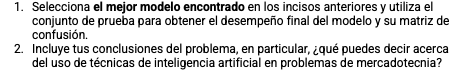



---


El mejor modelo lo arroja la búsqueda en el Grid de Neural Networks combinando a su vez la búsqueda del número de capas ocultas con su respectiva red de número de neuronas. En este mismo archivo se demuestra ese hecho.

Esto demuestra que las técnicas de Inteligencia Artificial son opciones importantes para tomar decisiones financieras basadas en campañas de mercadotecnia.

---

In [ ]:
from sklearn.neural_network import MLPClassifier

#modelo_NN = MLPClassifier(hidden_layer_sizes=(91, 91), max_iter=400, alpha = 0.4, activation='relu', learning_rate_init = 0.001, solver = 'sgd', random_state = 42)
modelo_NN = MLPClassifier(hidden_layer_sizes=(91, 91), max_iter=400, alpha = 0.4, activation='relu', learning_rate_init = 0.01, solver = 'adam', random_state = 42)
modelo_NN.fit(x_train, y_train)

print(modelo_NN.score (x_validation, y_validation))
print(modelo_NN.score (x_test, y_test))

0.8266666666666667
0.8266666666666667


In [ ]:
conf_matrix = Confusion_Matrix(modelo_NN, x_validation, y_validation)
conf_matrix_acc = (conf_matrix[0][0]+conf_matrix[1][1])/np.sum(conf_matrix)
print("Confusion Matrix Accuracy: {:.2f}%".format( conf_matrix_acc*100))

Confusion Matrix Accuracy: 82.67%


In [ ]:
print(conf_matrix)

[[870 165]
 [147 618]]




---
Se utiliza el modelo recién entrenado de MLP Classifier.

---




In [ ]:
model = modelo_NN

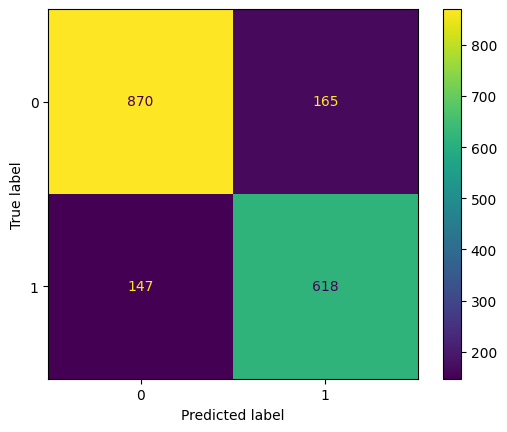

In [ ]:
Draw_Confusion_Matrix(modelo_NN, x_validation, y_validation)



---
A continuación ejecutamos una rutina para a partir de allí, graficar por medio de curvas de aprendizaje capas ***i*** con sus respectivas neuronas ***i*** y revisar la mejor opción para no tener un modelo sobreentrenado ni subentrenado.

Esto se logra con hiperparámetros como un **alpha** medio y utilizando los mejores hiperparámetros ejecutando la matriz **GridSearchCV**.

---




In [ ]:
#Modelo Mejorado (ni Subentrenado ni Sobreentrenado) con MLP Classifier usando los hiperparámetros a partir de
#GridSearchCV

from sklearn.datasets import make_classification
from sklearn. neural_network import MLPClassifier
import numpy as np

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

neuronas = [i for i in range(1, 200, 10)]

print(neuronas)

train_scores, test_scores, val_scores = list(), list(), list()
train_errors, test_errors, val_errors = list(), list(), list()

for i in neuronas:
  model = MLPClassifier(hidden_layer_sizes=(i,i),
    max_iter=400, activation='relu', learning_rate_init = 0.01, solver = 'adam',
    alpha=0.4,
    random_state=42)

  model.fit(x_train, y_train)

  # Predicciones y métricas con el conjunto de entrenamiento:
  train_yhat = model.predict(x_train)

  train_loss = np.mean(abs(y_train - train_yhat))
  train_errors.append(train_loss)

  train_acc = 1 - train_loss
  train_scores.append(train_acc)

  # Predicciones y métricas con el conjunto de prueba:
  test_yhat = model.predict(x_test)

  test_loss = np.mean(abs(y_test - test_yhat))
  test_errors.append(test_loss)

  test_acc = 1 - test_loss
  test_scores.append(test_acc)

  # Predicciones y métricas con el conjunto de validación:
  val_yhat = model.predict(x_validation)

  val_loss = np.mean(abs(y_validation - val_yhat))
  val_errors.append(val_loss)

  val_acc = 1 - val_loss
  val_scores.append(val_acc)

  # evolución de las métricas durante el entrenamiento ...

  print('> %d\t trainacc: %.3f, testacc: %.3f, valacc: %.3f, trainloss: %.3f, testloss: %.3f, valloss: %.3f'
    % (i, train_acc, test_acc, val_acc, train_loss, test_loss, val_loss))


(5400, 16) (1800, 16) (5400,) (1800,)
[1, 11, 21, 31, 41, 51, 61, 71, 81, 91, 101, 111, 121, 131, 141, 151, 161, 171, 181, 191]
> 1	 trainacc: 0.586, testacc: 0.564, valacc: 0.575, trainloss: 0.414, testloss: 0.436, valloss: 0.425
> 11	 trainacc: 0.834, testacc: 0.808, valacc: 0.814, trainloss: 0.166, testloss: 0.192, valloss: 0.186
> 21	 trainacc: 0.835, testacc: 0.809, valacc: 0.819, trainloss: 0.165, testloss: 0.191, valloss: 0.181
> 31	 trainacc: 0.844, testacc: 0.814, valacc: 0.816, trainloss: 0.156, testloss: 0.186, valloss: 0.184
> 41	 trainacc: 0.854, testacc: 0.826, valacc: 0.820, trainloss: 0.146, testloss: 0.174, valloss: 0.180
> 51	 trainacc: 0.843, testacc: 0.816, valacc: 0.810, trainloss: 0.157, testloss: 0.184, valloss: 0.190
> 61	 trainacc: 0.857, testacc: 0.818, valacc: 0.817, trainloss: 0.143, testloss: 0.182, valloss: 0.183
> 71	 trainacc: 0.848, testacc: 0.814, valacc: 0.807, trainloss: 0.152, testloss: 0.186, valloss: 0.193
> 81	 trainacc: 0.850, testacc: 0.817, va



---
A continuación se obtiene el gráfico de las Curvas de Aprendizaje (Accuracy) que muestran que no hay un sobreentrenamiento ni tampoco de subentrenamiento debido a la forma de la gráfica de validación y de pruebas y en donde se ve una tendencia a seguir al gráfico de entrenamiento por un margen cerrado. La tendencia es mantenerse en esa tendencia y por lo tanto hay una aprendizaje bien establecido.

En el siguiente gráfico, se muestra la tendencia del error que simplemente es el complemento del gráfico de Accuracy mostrando la mejor práctica explicada en la teoría.

El caso mostrado corresponde a lo solicitado en el reto de poblaciones de **60%**, **20%** y **20%** de los segmentos de entrenamiento, pruebas y validación para el modelo de MLP de Redes Neuronales.


---



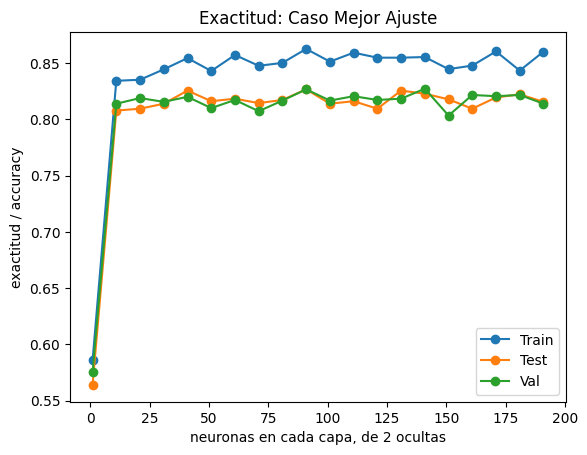

In [ ]:
import matplotlib.pyplot as plt

plt.plot(neuronas, train_scores, '-o', label='Train')
plt.plot(neuronas, test_scores, '-o', label='Test')
plt.plot(neuronas, val_scores, '-o', label='Val')
plt.legend()
plt.title('Exactitud: Caso Mejor Ajuste')
plt.xlabel('neuronas en cada capa, de 2 ocultas')
plt.ylabel('exactitud / accuracy')
plt.show()

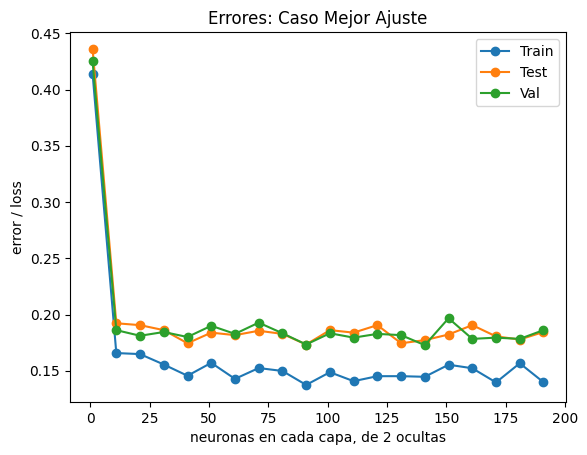

In [ ]:
import matplotlib.pyplot as plt

plt.plot(neuronas, train_errors, '-o', label='Train')
plt.plot(neuronas, test_errors, '-o', label='Test')
plt.plot(neuronas, val_errors, '-o', label='Val')
plt.legend()
plt.title('Errores: Caso Mejor Ajuste')
plt.xlabel('neuronas en cada capa, de 2 ocultas')
plt.ylabel('error / loss')
plt.show()



---
A continuación se muestra una alternatica de Curvas de Aprendizaje para el modelo de **Logistic Regression** alterno que toma en cuenta diversos tamaños de población en los conjuntos de entrenamiento, validación y pruebas.

---




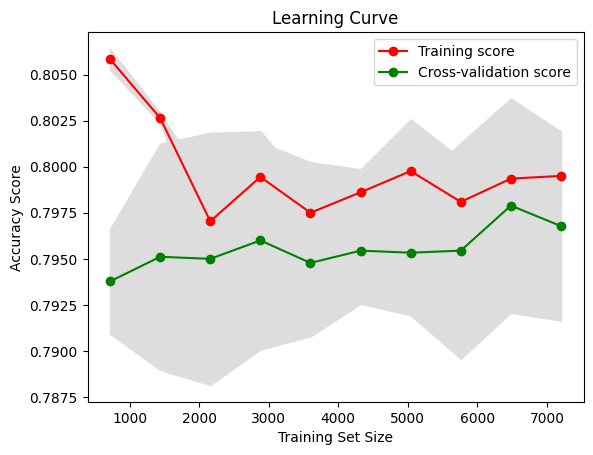

In [ ]:
#Modelo Mejorado (ni Subentrenado ni Sobreentrenado) con Logistic Regression
#Código generado por CHATGPT

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

def plot_learning_curves(model, X, y):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y,
        train_sizes=np.linspace(0.1, 1.0, 10),
        cv=5,
        scoring='accuracy',
        n_jobs=-1)

    # Calculate mean and standard deviation for training set scores
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)

    # Calculate mean and standard deviation for test set scores
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Plotting the Learning Curves
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")
    plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")

    plt.title("Learning Curve")
    plt.xlabel("Training Set Size")
    plt.ylabel("Accuracy Score")
    plt.legend(loc="best")
    plt.show()

# Create a pipeline that includes scaling and logistic regression
model = make_pipeline(
  StandardScaler(),
  LogisticRegression( C=1.0,
  solver='newton-cg',
  max_iter=100,
  random_state=42))

# Assuming X and y are your features and target variable
plot_learning_curves(model, X, y)





---
A continuación se muestra una alternatica de Curvas de Aprendizaje para el modelo de **MLP Classifier** alterno que toma en cuenta diversos tamaños de población en los conjuntos de entrenamiento, validación y pruebas.

---




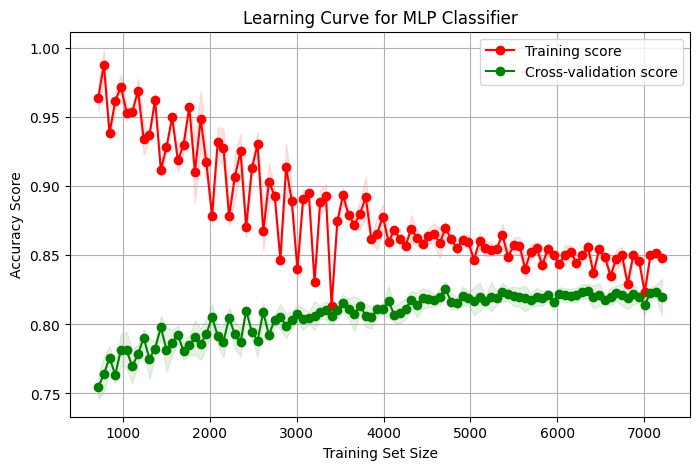

In [ ]:
#Modelo Mejorado (ni Subentrenado ni Sobreentrenado) con MLP Classification
#Código generado por CHATGPT

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

def plot_learning_curves(model, X, y):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y,
        train_sizes=np.linspace(0.1, 1.0, 100),
        cv=5,  # Using 5-fold cross-validation
        scoring='accuracy',  # Metric for evaluation, can be adjusted based on the problem
        n_jobs=-1  # Use all computer cores
    )

    # Mean and standard deviation of training set scores
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)

    # Mean and standard deviation of cross-validation set scores
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(8, 5))
    plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")

    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")

    plt.title("Learning Curve for MLP Classifier")
    plt.xlabel("Training Set Size")
    plt.ylabel("Accuracy Score")
    plt.legend(loc="best")
    plt.grid(True)
    plt.show()

# Create a pipeline with feature scaling and MLP Classifier
mlp_pipeline = make_pipeline(
    StandardScaler(),
    MLPClassifier(hidden_layer_sizes=(91,91),
    max_iter=400, activation='relu', learning_rate_init = 0.01, solver = 'adam',
    alpha=0.4,
    random_state=42))
# Assuming X and y are your data features and target variable
plot_learning_curves(mlp_pipeline, X, y)


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptro

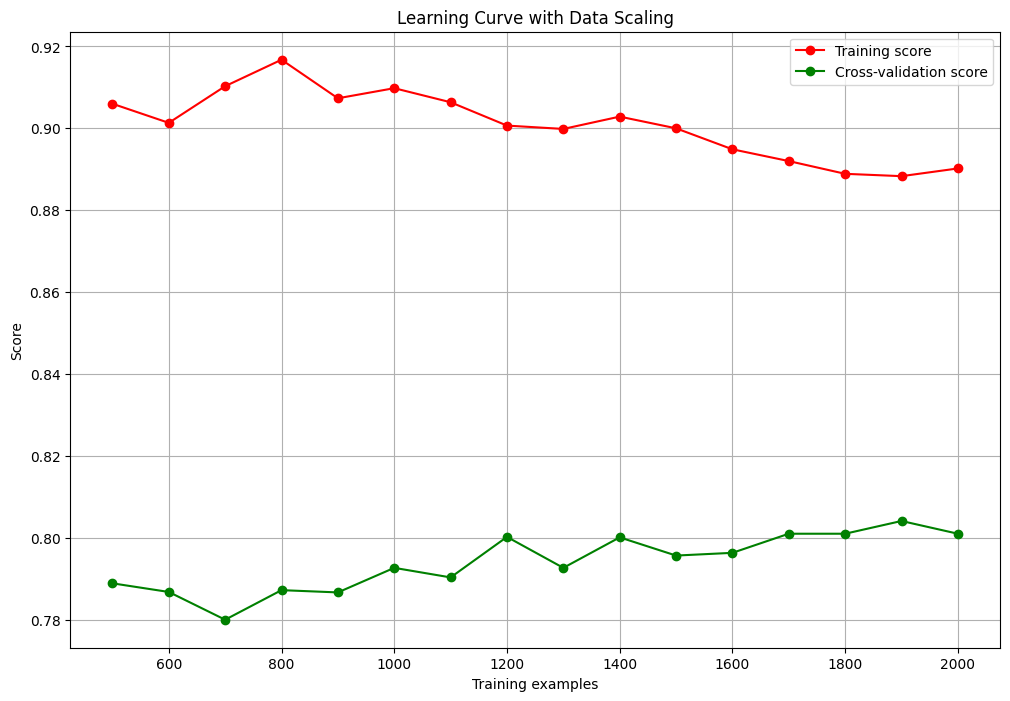

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

# Define a pipeline that includes scaling and the classifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Ensure data is scaled properly
    ('mlp', MLPClassifier(random_state=42))
])

# Specify the range of training sizes
train_sizes = np.arange(500, 2001, 100)

# Generate the learning curves
train_sizes, train_scores, validation_scores = learning_curve(
    estimator=pipeline,  # Use the pipeline in the learning curve
    X=X,  # Assuming 'X' and 'y' are your complete datasets
    y=y,
    train_sizes=train_sizes,
    cv=5,  # Number of folds in cross-validation
    scoring='accuracy'
)

# Plotting the learning curves
plt.figure(figsize=(12, 8))
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color="r", label="Training score")
plt.plot(train_sizes, np.mean(validation_scores, axis=1), 'o-', color="g", label="Cross-validation score")
plt.title('Learning Curve with Data Scaling')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.legend(loc="best")
plt.grid()
plt.show()


In [30]:
#Uso de malla (Grid) para sacar los mejores hiperparámetros

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Define a pipeline to include preprocessing (e.g., scaling) and the classifier
pipeline = Pipeline([
#    ('scaler', StandardScaler()),
    ('mlp', MLPClassifier(random_state=42))
])

# Define the parameter grid to search
param_grid = {
    #'mlp__hidden_layer_sizes': [(40, 40), (91, 91)],  # Different configurations of hidden layers
    #'mlp__activation': ['tanh', 'relu'],  # Activation functions
    #'mlp__solver': ['sgd', 'adam'],  # Optimizers
    #'mlp__alpha': [0.3, 0.4],  # L2 penalty (regularization term)
    #'mlp__learning_rate_init': [0.001, 0.01],  # Initial learning rate
    #'mlp__max_iter': [400, 500]  # Max number of epochs

    'mlp__hidden_layer_sizes': [(91, 91)],  # Different configurations of hidden layers
    'mlp__activation': ['relu'],  # Activation functions
    'mlp__solver': ['sgd'],  # Optimizers
    'mlp__alpha': [0.4],  # L2 penalty (regularization term)
    'mlp__learning_rate_init': [0.001],  # Initial learning rate
    'mlp__max_iter': [400]  # Max number of epochs
}

# Create the GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid, cv=5, verbose=5, scoring='accuracy')

# Example: Assuming X_train and y_train are your data and labels respectively
# Fit GridSearchCV
try:
  grid_search.fit(x_train, y_train)
except Exception as e:
  print("Error during GridSearchCV:", str(e))

# Best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)
model = MLPClassifier(hidden_layer_sizes=grid_search.best_params_['mlp__hidden_layer_sizes'],
                      activation=grid_search.best_params_['mlp__activation'],
                      solver=grid_search.best_params_['mlp__solver'],
                      alpha=grid_search.best_params_['mlp__alpha'],
                      learning_rate_init=grid_search.best_params_['mlp__learning_rate_init'],
                      max_iter=grid_search.best_params_['mlp__max_iter'],
                      random_state=42)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with the best Hyperparameters (test):", accuracy)
y_pred = model.predict(x_validation)
accuracy = accuracy_score(y_validation, y_pred)
print("Accuracy with the best Hyperparameters (validation):", accuracy)

# Best model
best_model = grid_search.best_estimator_

# Optionally, you can now evaluate 'best_model' on your test data

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END mlp__activation=relu, mlp__alpha=0.4, mlp__hidden_layer_sizes=(91, 91), mlp__learning_rate_init=0.001, mlp__max_iter=400, mlp__solver=sgd;, score=0.797 total time=  23.5s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END mlp__activation=relu, mlp__alpha=0.4, mlp__hidden_layer_sizes=(91, 91), mlp__learning_rate_init=0.001, mlp__max_iter=400, mlp__solver=sgd;, score=0.836 total time=  22.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END mlp__activation=relu, mlp__alpha=0.4, mlp__hidden_layer_sizes=(91, 91), mlp__learning_rate_init=0.001, mlp__max_iter=400, mlp__solver=sgd;, score=0.816 total time=  19.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END mlp__activation=relu, mlp__alpha=0.4, mlp__hidden_layer_sizes=(91, 91), mlp__learning_rate_init=0.001, mlp__max_iter=400, mlp__solver=sgd;, score=0.825 total time=  22.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END mlp__activation=relu, mlp__alpha=0.4, mlp__hidden_layer_sizes=(91, 91), mlp__learning_rate_init=0.001, mlp__max_iter=400, mlp__solver=sgd;, score=0.806 total time=  19.8s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


Best hyperparameters: {'mlp__activation': 'relu', 'mlp__alpha': 0.4, 'mlp__hidden_layer_sizes': (91, 91), 'mlp__learning_rate_init': 0.001, 'mlp__max_iter': 400, 'mlp__solver': 'sgd'}
Accuracy with the best Hyperparameters (test): 0.815
Accuracy with the best Hyperparameters (validation): 0.8183333333333334


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
